# Overcooked AI 


In [114]:
# Imports 

import gym
import os
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from gymnasium import spaces
import pygame
from matplotlib import animation
from IPython.display import HTML

In [119]:
# Overcooked AI Imports 

import gymnasium as gym
from overcooked_ai_py.mdp.overcooked_mdp import (
    EVENT_TYPES,
    OvercookedGridworld,
)
from overcooked_ai_py.mdp.overcooked_env import (
    OvercookedEnv,
    Overcooked
)
from overcooked_ai_py.agents.agent import RandomAgent, AgentPair, GreedyHumanModel
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
from overcooked_ai_py.mdp.actions import Action
from overcooked_ai_py.mdp.overcooked_trajectory import (
    DEFAULT_TRAJ_KEYS,
    EPISODE_TRAJ_KEYS,
    TIMESTEP_TRAJ_KEYS,
)
from overcooked_ai_py.planning.planners import (
    NO_COUNTERS_PARAMS,
    MediumLevelActionManager,
    MotionPlanner,
)
from overcooked_ai_py.agents.benchmarking import AgentEvaluator

In [116]:
# MDP - Layout and ENV 

# Available Default Layouts 
layout_path = '/Users/shinyweng/Documents/GitHub/CS234_Overcooked_AI/overcooked_ai_py/data/layouts'
layouts = [x.split(".")[0] for x in os.listdir(layout_path)]

# Create MDP and Env
mdp = OvercookedGridworld.from_layout_name(layouts[1])
env = OvercookedEnv.from_mdp(mdp, horizon=400)
env.reset()

In [37]:
# Create Agents Manually -- Completely Random 

agent0 = RandomAgent()
agent1 = RandomAgent()
agent_pair = AgentPair(agent0, agent1)

In [106]:
# Test Agents on Random Trajectory

# Create MDP and Env for Layout on Random Trajectory
mdp = OvercookedGridworld.from_layout_name(layouts[1])
env = OvercookedEnv.from_mdp(mdp, horizon=400)
env.reset()

# Create Agent Evaluator
agent_evaluator = AgentEvaluator.from_mdp(mdp, env_params={'horizon': 400})
agent_evaluator

# Test Agents on Random Trajectory
random_trajectory = agent_evaluator.evaluate_random_pair(num_games=10, display=False)
StateVisualizer().display_rendered_trajectory(random_trajectory, ipython_display=True)

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 400.00; : 100%|██████████| 10/10 [00:00<00:00, 27.56it/s]


interactive(children=(IntSlider(value=0, description='timestep', max=399), Output()), _dom_classes=('widget-in…

In [129]:
# Test Agents on Greedy Trajectory

# Create MDP and Env for Layout on Greedy Trajectory
mdp = OvercookedGridworld.from_layout_name(layouts[3])
env = OvercookedEnv.from_mdp(mdp, horizon=400)
env.reset()

# Create Agent Evaluator
agent_evaluator = AgentEvaluator.from_mdp(mdp, env_params={'horizon': 400})
agent_evaluator

# Test Agents on Greedy Trajectory
greedy_trajectory = agent_evaluator.evaluate_human_model_pair(num_games=1, display=False)
StateVisualizer().display_rendered_trajectory(greedy_trajectory, ipython_display=True)

Avg rew: 240.00 (std: 0.00, se: 0.00); avg len: 400.00; : 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]


interactive(children=(IntSlider(value=0, description='timestep', max=399), Output()), _dom_classes=('widget-in…

In [118]:
# Runs Multiple Episodes with Given Pair of Agents 

env.reset()
agent0 = RandomAgent()
agent1 = RandomAgent()
agent_pair = AgentPair(agent0, agent1)
trajectories = env.get_rollouts(agent_pair, num_games=100, display=False)
print("Trajectories: ", trajectories)

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 400.00; :   4%|▍         | 4/100 [00:00<00:02, 32.06it/s]

Computing MotionPlanner


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 400.00; : 100%|██████████| 100/100 [00:03<00:00, 29.23it/s]


Trajectories:  {'ep_lengths': array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400]), 'mdp_params': array([{'layout_name': 'simple_o', 'terrain': [['X', 'X', 'P', 'X', 'X'], ['X', ' ', ' ', ' ', 'X'], ['X', ' ', ' ', ' ', 'O'], ['X', 'X', 'D', 'S', 'X']], 'start_player_positions': [(1, 2), (3, 1)], 'start_bonus_orders': [], 'rew_shaping_params': {'PLACEMENT_IN_POT_REW': 3, 'DISH_PICKUP_REWARD': 3, 'SOUP_PICKUP_REWARD': 5, 'DISH_DISP_DISTANCE_REW': 0, 'POT_DISTANCE_REW': 0, 'SOUP_DISTANCE_REW':

In [124]:
# Runs Multiple Episodes with Given Pair of Agents 

env.reset()
a0 = GreedyHumanModel(mlam=MediumLevelActionManager(env.mdp, NO_COUNTERS_PARAMS))
a1 = GreedyHumanModel(mlam=MediumLevelActionManager(env.mdp, NO_COUNTERS_PARAMS))
agent_pair = AgentPair(a0, a1)
trajectories = env.get_rollouts(agent_pair, num_games=100, display=False)
print("Trajectories: ", trajectories)

Avg rew: 226.67 (std: 9.43, se: 5.44); avg len: 400.00; :   2%|▏         | 2/100 [00:00<00:07, 13.23it/s] 

Computing MotionPlanner


Avg rew: 224.60 (std: 19.15, se: 1.92); avg len: 400.00; : 100%|██████████| 100/100 [00:08<00:00, 12.37it/s]

Trajectories:  {'ep_lengths': array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400,
       400, 400, 400, 400, 400, 400, 400, 400, 400]), 'mdp_params': array([{'layout_name': 'simple_o', 'terrain': [['X', 'X', 'P', 'X', 'X'], ['X', ' ', ' ', ' ', 'X'], ['X', ' ', ' ', ' ', 'O'], ['X', 'X', 'D', 'S', 'X']], 'start_player_positions': [(1, 2), (3, 1)], 'start_bonus_orders': [], 'rew_shaping_params': {'PLACEMENT_IN_POT_REW': 3, 'DISH_PICKUP_REWARD': 3, 'SOUP_PICKUP_REWARD': 5, 'DISH_DISP_DISTANCE_REW': 0, 'POT_DISTANCE_REW': 0, 'SOUP_DISTANCE_REW':

Starting training...
Computing MediumLevelActionManager
Device:  mps


  0%|          | 0/1000 [00:00<?, ?it/s]

Computing MotionPlanner
Computing MediumLevelActionManager


  0%|          | 1/1000 [00:03<50:55,  3.06s/it]

Episode: 0, Average Reward: 0.00, Epsilon: 0.16
Computing MediumLevelActionManager


  0%|          | 2/1000 [00:06<55:01,  3.31s/it]

Computing MediumLevelActionManager


  0%|          | 3/1000 [00:10<56:55,  3.43s/it]

Computing MediumLevelActionManager


  0%|          | 4/1000 [00:13<56:33,  3.41s/it]

Computing MediumLevelActionManager


  0%|          | 5/1000 [00:17<57:40,  3.48s/it]

Computing MediumLevelActionManager


  1%|          | 6/1000 [00:20<56:54,  3.44s/it]

Computing MediumLevelActionManager


  1%|          | 7/1000 [00:23<56:45,  3.43s/it]

Computing MediumLevelActionManager


  1%|          | 8/1000 [00:27<56:16,  3.40s/it]

Computing MediumLevelActionManager


  1%|          | 9/1000 [00:30<55:43,  3.37s/it]

Computing MediumLevelActionManager


  1%|          | 10/1000 [00:33<55:27,  3.36s/it]

Computing MediumLevelActionManager


  1%|          | 11/1000 [00:37<55:12,  3.35s/it]

Episode: 10, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  1%|          | 12/1000 [00:40<55:02,  3.34s/it]

Computing MediumLevelActionManager


  1%|▏         | 13/1000 [00:43<55:01,  3.34s/it]

Computing MediumLevelActionManager


  1%|▏         | 14/1000 [00:47<55:04,  3.35s/it]

Computing MediumLevelActionManager


  2%|▏         | 15/1000 [00:50<54:51,  3.34s/it]

Computing MediumLevelActionManager


  2%|▏         | 16/1000 [00:53<54:47,  3.34s/it]

Computing MediumLevelActionManager


  2%|▏         | 17/1000 [00:57<55:13,  3.37s/it]

Computing MediumLevelActionManager


  2%|▏         | 18/1000 [01:00<55:06,  3.37s/it]

Computing MediumLevelActionManager


  2%|▏         | 19/1000 [01:04<54:58,  3.36s/it]

Computing MediumLevelActionManager


  2%|▏         | 20/1000 [01:07<54:47,  3.35s/it]

Computing MediumLevelActionManager


  2%|▏         | 21/1000 [01:10<54:51,  3.36s/it]

Episode: 20, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  2%|▏         | 22/1000 [01:14<54:42,  3.36s/it]

Computing MediumLevelActionManager


  2%|▏         | 23/1000 [01:17<55:13,  3.39s/it]

Computing MediumLevelActionManager


  2%|▏         | 24/1000 [01:20<54:57,  3.38s/it]

Computing MediumLevelActionManager


  2%|▎         | 25/1000 [01:24<58:18,  3.59s/it]

Computing MediumLevelActionManager


  3%|▎         | 26/1000 [01:28<57:13,  3.53s/it]

Computing MediumLevelActionManager


  3%|▎         | 27/1000 [01:31<56:15,  3.47s/it]

Computing MediumLevelActionManager


  3%|▎         | 28/1000 [01:35<55:32,  3.43s/it]

Computing MediumLevelActionManager


  3%|▎         | 29/1000 [01:38<55:03,  3.40s/it]

Computing MediumLevelActionManager


  3%|▎         | 30/1000 [01:41<54:52,  3.39s/it]

Computing MediumLevelActionManager


  3%|▎         | 31/1000 [01:45<54:27,  3.37s/it]

Episode: 30, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  3%|▎         | 32/1000 [01:48<54:09,  3.36s/it]

Computing MediumLevelActionManager


  3%|▎         | 33/1000 [01:51<53:58,  3.35s/it]

Computing MediumLevelActionManager


  3%|▎         | 34/1000 [01:55<53:50,  3.34s/it]

Computing MediumLevelActionManager


  4%|▎         | 35/1000 [01:58<54:11,  3.37s/it]

Computing MediumLevelActionManager


  4%|▎         | 36/1000 [02:01<54:03,  3.37s/it]

Computing MediumLevelActionManager


  4%|▎         | 37/1000 [02:05<53:50,  3.35s/it]

Computing MediumLevelActionManager


  4%|▍         | 38/1000 [02:08<53:39,  3.35s/it]

Computing MediumLevelActionManager


  4%|▍         | 39/1000 [02:11<53:29,  3.34s/it]

Computing MediumLevelActionManager


  4%|▍         | 40/1000 [02:15<53:22,  3.34s/it]

Computing MediumLevelActionManager


  4%|▍         | 41/1000 [02:18<53:48,  3.37s/it]

Episode: 40, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  4%|▍         | 42/1000 [02:21<53:38,  3.36s/it]

Computing MediumLevelActionManager


  4%|▍         | 43/1000 [02:25<53:23,  3.35s/it]

Computing MediumLevelActionManager


  4%|▍         | 44/1000 [02:28<53:14,  3.34s/it]

Computing MediumLevelActionManager


  4%|▍         | 45/1000 [02:31<53:08,  3.34s/it]

Computing MediumLevelActionManager


  5%|▍         | 46/1000 [02:35<53:01,  3.33s/it]

Computing MediumLevelActionManager


  5%|▍         | 47/1000 [02:38<53:19,  3.36s/it]

Computing MediumLevelActionManager


  5%|▍         | 48/1000 [02:42<53:18,  3.36s/it]

Computing MediumLevelActionManager


  5%|▍         | 49/1000 [02:45<53:04,  3.35s/it]

Computing MediumLevelActionManager


  5%|▌         | 50/1000 [02:48<52:55,  3.34s/it]

Computing MediumLevelActionManager


  5%|▌         | 51/1000 [02:52<53:20,  3.37s/it]

Episode: 50, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  5%|▌         | 52/1000 [02:55<52:57,  3.35s/it]

Computing MediumLevelActionManager


  5%|▌         | 53/1000 [02:58<52:43,  3.34s/it]

Computing MediumLevelActionManager


  5%|▌         | 54/1000 [03:02<52:36,  3.34s/it]

Computing MediumLevelActionManager


  6%|▌         | 55/1000 [03:05<52:30,  3.33s/it]

Computing MediumLevelActionManager


  6%|▌         | 56/1000 [03:08<52:29,  3.34s/it]

Computing MediumLevelActionManager


  6%|▌         | 57/1000 [03:12<52:23,  3.33s/it]

Computing MediumLevelActionManager


  6%|▌         | 58/1000 [03:15<52:18,  3.33s/it]

Computing MediumLevelActionManager


  6%|▌         | 59/1000 [03:18<52:45,  3.36s/it]

Computing MediumLevelActionManager


  6%|▌         | 60/1000 [03:22<52:23,  3.34s/it]

Computing MediumLevelActionManager


  6%|▌         | 61/1000 [03:25<52:18,  3.34s/it]

Episode: 60, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  6%|▌         | 62/1000 [03:28<52:16,  3.34s/it]

Computing MediumLevelActionManager


  6%|▋         | 63/1000 [03:32<52:08,  3.34s/it]

Computing MediumLevelActionManager


  6%|▋         | 64/1000 [03:35<51:57,  3.33s/it]

Computing MediumLevelActionManager


  6%|▋         | 65/1000 [03:38<51:50,  3.33s/it]

Computing MediumLevelActionManager


  7%|▋         | 66/1000 [03:42<51:39,  3.32s/it]

Computing MediumLevelActionManager


  7%|▋         | 67/1000 [03:45<51:35,  3.32s/it]

Computing MediumLevelActionManager


  7%|▋         | 68/1000 [03:48<51:32,  3.32s/it]

Computing MediumLevelActionManager


  7%|▋         | 69/1000 [03:51<51:26,  3.32s/it]

Computing MediumLevelActionManager


  7%|▋         | 70/1000 [03:55<51:52,  3.35s/it]

Computing MediumLevelActionManager


  7%|▋         | 71/1000 [03:58<51:32,  3.33s/it]

Episode: 70, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  7%|▋         | 72/1000 [04:02<51:25,  3.33s/it]

Computing MediumLevelActionManager


  7%|▋         | 73/1000 [04:05<51:24,  3.33s/it]

Computing MediumLevelActionManager


  7%|▋         | 74/1000 [04:08<51:23,  3.33s/it]

Computing MediumLevelActionManager


  8%|▊         | 75/1000 [04:12<51:17,  3.33s/it]

Computing MediumLevelActionManager


  8%|▊         | 76/1000 [04:15<51:16,  3.33s/it]

Computing MediumLevelActionManager


  8%|▊         | 77/1000 [04:18<51:46,  3.37s/it]

Computing MediumLevelActionManager


  8%|▊         | 78/1000 [04:22<52:08,  3.39s/it]

Computing MediumLevelActionManager


  8%|▊         | 79/1000 [04:25<52:34,  3.43s/it]

Computing MediumLevelActionManager


  8%|▊         | 80/1000 [04:29<52:06,  3.40s/it]

Computing MediumLevelActionManager


  8%|▊         | 81/1000 [04:32<51:36,  3.37s/it]

Episode: 80, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  8%|▊         | 82/1000 [04:35<51:15,  3.35s/it]

Computing MediumLevelActionManager


  8%|▊         | 83/1000 [04:39<51:05,  3.34s/it]

Computing MediumLevelActionManager


  8%|▊         | 84/1000 [04:42<51:01,  3.34s/it]

Computing MediumLevelActionManager


  8%|▊         | 85/1000 [04:45<50:55,  3.34s/it]

Computing MediumLevelActionManager


  9%|▊         | 86/1000 [04:49<50:51,  3.34s/it]

Computing MediumLevelActionManager


  9%|▊         | 87/1000 [04:52<50:43,  3.33s/it]

Computing MediumLevelActionManager


  9%|▉         | 88/1000 [04:55<51:05,  3.36s/it]

Computing MediumLevelActionManager


  9%|▉         | 89/1000 [04:59<50:52,  3.35s/it]

Computing MediumLevelActionManager


  9%|▉         | 90/1000 [05:02<50:44,  3.35s/it]

Computing MediumLevelActionManager


  9%|▉         | 91/1000 [05:05<50:36,  3.34s/it]

Episode: 90, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


  9%|▉         | 92/1000 [05:09<50:29,  3.34s/it]

Computing MediumLevelActionManager


  9%|▉         | 93/1000 [05:12<50:26,  3.34s/it]

Computing MediumLevelActionManager


  9%|▉         | 94/1000 [05:15<50:18,  3.33s/it]

Computing MediumLevelActionManager


 10%|▉         | 95/1000 [05:19<50:41,  3.36s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 10%|▉         | 96/1000 [05:22<50:26,  3.35s/it]

Computing MediumLevelActionManager


 10%|▉         | 97/1000 [05:25<50:18,  3.34s/it]

Computing MediumLevelActionManager


 10%|▉         | 98/1000 [05:29<50:12,  3.34s/it]

Computing MediumLevelActionManager


 10%|▉         | 99/1000 [05:32<50:02,  3.33s/it]

Computing MediumLevelActionManager


 10%|█         | 100/1000 [05:35<49:59,  3.33s/it]

Computing MediumLevelActionManager


 10%|█         | 101/1000 [05:39<49:51,  3.33s/it]

Episode: 100, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 10%|█         | 102/1000 [05:42<50:06,  3.35s/it]

Computing MediumLevelActionManager


 10%|█         | 103/1000 [05:45<50:02,  3.35s/it]

Computing MediumLevelActionManager


 10%|█         | 104/1000 [05:49<49:58,  3.35s/it]

Computing MediumLevelActionManager


 10%|█         | 105/1000 [05:52<49:53,  3.34s/it]

Computing MediumLevelActionManager


 11%|█         | 106/1000 [05:55<50:08,  3.37s/it]

Computing MediumLevelActionManager


 11%|█         | 107/1000 [05:59<50:00,  3.36s/it]

Computing MediumLevelActionManager


 11%|█         | 108/1000 [06:02<49:41,  3.34s/it]

Computing MediumLevelActionManager


 11%|█         | 109/1000 [06:05<49:34,  3.34s/it]

Computing MediumLevelActionManager


 11%|█         | 110/1000 [06:09<49:30,  3.34s/it]

Computing MediumLevelActionManager


 11%|█         | 111/1000 [06:12<49:23,  3.33s/it]

Episode: 110, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 11%|█         | 112/1000 [06:15<49:17,  3.33s/it]

Computing MediumLevelActionManager


 11%|█▏        | 113/1000 [06:19<49:43,  3.36s/it]

Computing MediumLevelActionManager


 11%|█▏        | 114/1000 [06:22<49:30,  3.35s/it]

Computing MediumLevelActionManager


 12%|█▏        | 115/1000 [06:26<49:22,  3.35s/it]

Computing MediumLevelActionManager


 12%|█▏        | 116/1000 [06:29<49:19,  3.35s/it]

Computing MediumLevelActionManager


 12%|█▏        | 117/1000 [06:32<49:13,  3.35s/it]

Computing MediumLevelActionManager


 12%|█▏        | 118/1000 [06:36<49:07,  3.34s/it]

Computing MediumLevelActionManager


 12%|█▏        | 119/1000 [06:39<48:59,  3.34s/it]

Computing MediumLevelActionManager


 12%|█▏        | 120/1000 [06:42<48:59,  3.34s/it]

Computing MediumLevelActionManager


 12%|█▏        | 121/1000 [06:46<48:53,  3.34s/it]

Episode: 120, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 12%|█▏        | 122/1000 [06:49<48:50,  3.34s/it]

Computing MediumLevelActionManager


 12%|█▏        | 123/1000 [06:52<48:47,  3.34s/it]

Computing MediumLevelActionManager


 12%|█▏        | 124/1000 [06:56<49:03,  3.36s/it]

Computing MediumLevelActionManager


 12%|█▎        | 125/1000 [06:59<48:52,  3.35s/it]

Computing MediumLevelActionManager


 13%|█▎        | 126/1000 [07:02<48:46,  3.35s/it]

Computing MediumLevelActionManager


 13%|█▎        | 127/1000 [07:06<48:41,  3.35s/it]

Computing MediumLevelActionManager


 13%|█▎        | 128/1000 [07:09<48:30,  3.34s/it]

Computing MediumLevelActionManager


 13%|█▎        | 129/1000 [07:12<48:30,  3.34s/it]

Computing MediumLevelActionManager


 13%|█▎        | 130/1000 [07:16<48:29,  3.34s/it]

Computing MediumLevelActionManager


 13%|█▎        | 131/1000 [07:19<48:57,  3.38s/it]

Episode: 130, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 13%|█▎        | 132/1000 [07:22<48:44,  3.37s/it]

Computing MediumLevelActionManager


 13%|█▎        | 133/1000 [07:26<48:34,  3.36s/it]

Computing MediumLevelActionManager


 13%|█▎        | 134/1000 [07:29<48:26,  3.36s/it]

Computing MediumLevelActionManager


 14%|█▎        | 135/1000 [07:33<48:20,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▎        | 136/1000 [07:36<48:11,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▎        | 137/1000 [07:39<48:35,  3.38s/it]

Computing MediumLevelActionManager


 14%|█▍        | 138/1000 [07:43<48:21,  3.37s/it]

Computing MediumLevelActionManager


 14%|█▍        | 139/1000 [07:46<48:03,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▍        | 140/1000 [07:49<47:55,  3.34s/it]

Computing MediumLevelActionManager


 14%|█▍        | 141/1000 [07:53<48:05,  3.36s/it]

Episode: 140, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 14%|█▍        | 142/1000 [07:56<47:57,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▍        | 143/1000 [07:59<47:51,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▍        | 144/1000 [08:03<47:44,  3.35s/it]

Computing MediumLevelActionManager


 14%|█▍        | 145/1000 [08:06<47:35,  3.34s/it]

Computing MediumLevelActionManager


 15%|█▍        | 146/1000 [08:09<47:34,  3.34s/it]

Computing MediumLevelActionManager


 15%|█▍        | 147/1000 [08:13<47:33,  3.34s/it]

Computing MediumLevelActionManager


 15%|█▍        | 148/1000 [08:16<47:25,  3.34s/it]

Computing MediumLevelActionManager


 15%|█▍        | 149/1000 [08:19<47:51,  3.37s/it]

Computing MediumLevelActionManager


 15%|█▌        | 150/1000 [08:23<47:39,  3.36s/it]

Computing MediumLevelActionManager


 15%|█▌        | 151/1000 [08:26<47:39,  3.37s/it]

Episode: 150, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 15%|█▌        | 152/1000 [08:30<47:56,  3.39s/it]

Computing MediumLevelActionManager


 15%|█▌        | 153/1000 [08:33<47:24,  3.36s/it]

Computing MediumLevelActionManager


 15%|█▌        | 154/1000 [08:36<47:13,  3.35s/it]

Computing MediumLevelActionManager


 16%|█▌        | 155/1000 [08:40<47:10,  3.35s/it]

Computing MediumLevelActionManager


 16%|█▌        | 156/1000 [08:43<47:04,  3.35s/it]

Computing MediumLevelActionManager


 16%|█▌        | 157/1000 [08:46<47:03,  3.35s/it]

Computing MediumLevelActionManager


 16%|█▌        | 158/1000 [08:50<46:59,  3.35s/it]

Computing MediumLevelActionManager


 16%|█▌        | 159/1000 [08:53<47:09,  3.37s/it]

Computing MediumLevelActionManager


 16%|█▌        | 160/1000 [08:56<46:55,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 16%|█▌        | 161/1000 [09:00<46:49,  3.35s/it]

Episode: 160, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 16%|█▌        | 162/1000 [09:03<46:36,  3.34s/it]

Computing MediumLevelActionManager


 16%|█▋        | 163/1000 [09:06<46:33,  3.34s/it]

Computing MediumLevelActionManager


 16%|█▋        | 164/1000 [09:10<46:31,  3.34s/it]

Computing MediumLevelActionManager


 16%|█▋        | 165/1000 [09:13<46:25,  3.34s/it]

Computing MediumLevelActionManager


 17%|█▋        | 166/1000 [09:17<46:52,  3.37s/it]

Computing MediumLevelActionManager


 17%|█▋        | 167/1000 [09:20<46:39,  3.36s/it]

Computing MediumLevelActionManager


 17%|█▋        | 168/1000 [09:23<46:30,  3.35s/it]

Computing MediumLevelActionManager


 17%|█▋        | 169/1000 [09:27<46:24,  3.35s/it]

Computing MediumLevelActionManager


 17%|█▋        | 170/1000 [09:30<46:15,  3.34s/it]

Computing MediumLevelActionManager


 17%|█▋        | 171/1000 [09:33<46:04,  3.34s/it]

Episode: 170, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 17%|█▋        | 172/1000 [09:36<45:57,  3.33s/it]

Computing MediumLevelActionManager


 17%|█▋        | 173/1000 [09:40<45:55,  3.33s/it]

Computing MediumLevelActionManager


 17%|█▋        | 174/1000 [09:43<45:56,  3.34s/it]

Computing MediumLevelActionManager


 18%|█▊        | 175/1000 [09:47<45:54,  3.34s/it]

Computing MediumLevelActionManager


 18%|█▊        | 176/1000 [09:50<45:52,  3.34s/it]

Computing MediumLevelActionManager


 18%|█▊        | 177/1000 [09:53<46:06,  3.36s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 18%|█▊        | 178/1000 [09:57<45:57,  3.35s/it]

Computing MediumLevelActionManager


 18%|█▊        | 179/1000 [10:00<45:50,  3.35s/it]

Computing MediumLevelActionManager


 18%|█▊        | 180/1000 [10:03<45:44,  3.35s/it]

Computing MediumLevelActionManager


 18%|█▊        | 181/1000 [10:07<45:40,  3.35s/it]

Episode: 180, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 18%|█▊        | 182/1000 [10:10<45:36,  3.35s/it]

Computing MediumLevelActionManager


 18%|█▊        | 183/1000 [10:13<45:34,  3.35s/it]

Computing MediumLevelActionManager


 18%|█▊        | 184/1000 [10:17<45:58,  3.38s/it]

Computing MediumLevelActionManager


 18%|█▊        | 185/1000 [10:20<45:42,  3.37s/it]

Computing MediumLevelActionManager


 19%|█▊        | 186/1000 [10:23<45:35,  3.36s/it]

Computing MediumLevelActionManager


 19%|█▊        | 187/1000 [10:27<45:35,  3.37s/it]

Computing MediumLevelActionManager


 19%|█▉        | 188/1000 [10:30<45:26,  3.36s/it]

Computing MediumLevelActionManager


 19%|█▉        | 189/1000 [10:34<45:14,  3.35s/it]

Computing MediumLevelActionManager


 19%|█▉        | 190/1000 [10:37<45:08,  3.34s/it]

Computing MediumLevelActionManager


 19%|█▉        | 191/1000 [10:40<45:01,  3.34s/it]

Episode: 190, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 19%|█▉        | 192/1000 [10:43<44:52,  3.33s/it]

Computing MediumLevelActionManager


 19%|█▉        | 193/1000 [10:47<44:48,  3.33s/it]

Computing MediumLevelActionManager


 19%|█▉        | 194/1000 [10:50<44:43,  3.33s/it]

Computing MediumLevelActionManager


 20%|█▉        | 195/1000 [10:54<45:03,  3.36s/it]

Computing MediumLevelActionManager


 20%|█▉        | 196/1000 [10:57<45:00,  3.36s/it]

Computing MediumLevelActionManager


 20%|█▉        | 197/1000 [11:00<44:54,  3.36s/it]

Computing MediumLevelActionManager


 20%|█▉        | 198/1000 [11:04<44:46,  3.35s/it]

Computing MediumLevelActionManager


 20%|█▉        | 199/1000 [11:07<44:40,  3.35s/it]

Computing MediumLevelActionManager


 20%|██        | 200/1000 [11:10<44:38,  3.35s/it]

Computing MediumLevelActionManager


 20%|██        | 201/1000 [11:14<44:33,  3.35s/it]

Episode: 200, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 20%|██        | 202/1000 [11:17<44:54,  3.38s/it]

Computing MediumLevelActionManager


 20%|██        | 203/1000 [11:20<44:42,  3.37s/it]

Computing MediumLevelActionManager


 20%|██        | 204/1000 [11:24<44:30,  3.35s/it]

Computing MediumLevelActionManager


 20%|██        | 205/1000 [11:27<44:25,  3.35s/it]

Computing MediumLevelActionManager


 21%|██        | 206/1000 [11:30<44:17,  3.35s/it]

Computing MediumLevelActionManager


 21%|██        | 207/1000 [11:34<44:13,  3.35s/it]

Computing MediumLevelActionManager


 21%|██        | 208/1000 [11:37<44:10,  3.35s/it]

Computing MediumLevelActionManager


 21%|██        | 209/1000 [11:40<44:08,  3.35s/it]

Computing MediumLevelActionManager


 21%|██        | 210/1000 [11:44<43:59,  3.34s/it]

Computing MediumLevelActionManager


 21%|██        | 211/1000 [11:47<43:54,  3.34s/it]

Episode: 210, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 21%|██        | 212/1000 [11:50<43:52,  3.34s/it]

Computing MediumLevelActionManager


 21%|██▏       | 213/1000 [11:54<44:10,  3.37s/it]

Computing MediumLevelActionManager


 21%|██▏       | 214/1000 [11:57<44:02,  3.36s/it]

Computing MediumLevelActionManager


 22%|██▏       | 215/1000 [12:01<43:54,  3.36s/it]

Computing MediumLevelActionManager


 22%|██▏       | 216/1000 [12:04<43:50,  3.35s/it]

Computing MediumLevelActionManager


 22%|██▏       | 217/1000 [12:07<43:43,  3.35s/it]

Computing MediumLevelActionManager


 22%|██▏       | 218/1000 [12:11<43:40,  3.35s/it]

Computing MediumLevelActionManager


 22%|██▏       | 219/1000 [12:14<43:34,  3.35s/it]

Computing MediumLevelActionManager


 22%|██▏       | 220/1000 [12:17<43:57,  3.38s/it]

Computing MediumLevelActionManager


 22%|██▏       | 221/1000 [12:21<43:45,  3.37s/it]

Episode: 220, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 22%|██▏       | 222/1000 [12:24<43:37,  3.36s/it]

Computing MediumLevelActionManager


 22%|██▏       | 223/1000 [12:27<43:30,  3.36s/it]

Computing MediumLevelActionManager


 22%|██▏       | 224/1000 [12:31<43:29,  3.36s/it]

Computing MediumLevelActionManager


 22%|██▎       | 225/1000 [12:34<43:51,  3.40s/it]

Computing MediumLevelActionManager


 23%|██▎       | 226/1000 [12:38<43:54,  3.40s/it]

Computing MediumLevelActionManager


 23%|██▎       | 227/1000 [12:41<43:47,  3.40s/it]

Computing MediumLevelActionManager


 23%|██▎       | 228/1000 [12:44<43:32,  3.38s/it]

Computing MediumLevelActionManager


 23%|██▎       | 229/1000 [12:48<43:18,  3.37s/it]

Computing MediumLevelActionManager


 23%|██▎       | 230/1000 [12:51<43:27,  3.39s/it]

Computing MediumLevelActionManager


 23%|██▎       | 231/1000 [12:55<43:10,  3.37s/it]

Episode: 230, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 23%|██▎       | 232/1000 [12:58<42:57,  3.36s/it]

Computing MediumLevelActionManager


 23%|██▎       | 233/1000 [13:01<42:54,  3.36s/it]

Computing MediumLevelActionManager


 23%|██▎       | 234/1000 [13:05<42:43,  3.35s/it]

Computing MediumLevelActionManager


 24%|██▎       | 235/1000 [13:08<42:41,  3.35s/it]

Computing MediumLevelActionManager


 24%|██▎       | 236/1000 [13:11<42:40,  3.35s/it]

Computing MediumLevelActionManager


 24%|██▎       | 237/1000 [13:15<42:38,  3.35s/it]

Computing MediumLevelActionManager


 24%|██▍       | 238/1000 [13:18<43:00,  3.39s/it]

Computing MediumLevelActionManager


 24%|██▍       | 239/1000 [13:21<42:44,  3.37s/it]

Computing MediumLevelActionManager


 24%|██▍       | 240/1000 [13:25<42:33,  3.36s/it]

Computing MediumLevelActionManager


 24%|██▍       | 241/1000 [13:28<42:28,  3.36s/it]

Episode: 240, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 24%|██▍       | 242/1000 [13:31<42:16,  3.35s/it]

Computing MediumLevelActionManager


 24%|██▍       | 243/1000 [13:35<42:06,  3.34s/it]

Computing MediumLevelActionManager


 24%|██▍       | 244/1000 [13:38<41:55,  3.33s/it]

Computing MediumLevelActionManager


 24%|██▍       | 245/1000 [13:41<41:54,  3.33s/it]

Computing MediumLevelActionManager


 25%|██▍       | 246/1000 [13:45<41:50,  3.33s/it]

Computing MediumLevelActionManager


 25%|██▍       | 247/1000 [13:48<41:50,  3.33s/it]

Computing MediumLevelActionManager


 25%|██▍       | 248/1000 [13:52<42:05,  3.36s/it]

Computing MediumLevelActionManager


 25%|██▍       | 249/1000 [13:55<41:54,  3.35s/it]

Computing MediumLevelActionManager


 25%|██▌       | 250/1000 [13:58<41:49,  3.35s/it]

Computing MediumLevelActionManager


 25%|██▌       | 251/1000 [14:01<41:41,  3.34s/it]

Episode: 250, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 25%|██▌       | 252/1000 [14:05<41:31,  3.33s/it]

Computing MediumLevelActionManager


 25%|██▌       | 253/1000 [14:08<41:24,  3.33s/it]

Computing MediumLevelActionManager


 25%|██▌       | 254/1000 [14:11<41:19,  3.32s/it]

Computing MediumLevelActionManager


 26%|██▌       | 255/1000 [14:15<41:19,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▌       | 256/1000 [14:18<41:41,  3.36s/it]

Computing MediumLevelActionManager


 26%|██▌       | 257/1000 [14:22<41:26,  3.35s/it]

Computing MediumLevelActionManager


 26%|██▌       | 258/1000 [14:25<41:14,  3.34s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 26%|██▌       | 259/1000 [14:28<41:10,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▌       | 260/1000 [14:31<41:01,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▌       | 261/1000 [14:35<40:55,  3.32s/it]

Episode: 260, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 26%|██▌       | 262/1000 [14:38<40:57,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▋       | 263/1000 [14:41<40:52,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▋       | 264/1000 [14:45<40:48,  3.33s/it]

Computing MediumLevelActionManager


 26%|██▋       | 265/1000 [14:48<40:44,  3.33s/it]

Computing MediumLevelActionManager


 27%|██▋       | 266/1000 [14:51<40:42,  3.33s/it]

Computing MediumLevelActionManager


 27%|██▋       | 267/1000 [14:55<40:40,  3.33s/it]

Computing MediumLevelActionManager


 27%|██▋       | 268/1000 [14:58<40:57,  3.36s/it]

Computing MediumLevelActionManager


 27%|██▋       | 269/1000 [15:02<40:53,  3.36s/it]

Computing MediumLevelActionManager


 27%|██▋       | 270/1000 [15:05<40:41,  3.34s/it]

Computing MediumLevelActionManager


 27%|██▋       | 271/1000 [15:08<40:30,  3.33s/it]

Episode: 270, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 27%|██▋       | 272/1000 [15:12<40:24,  3.33s/it]

Computing MediumLevelActionManager


 27%|██▋       | 273/1000 [15:15<40:20,  3.33s/it]

Computing MediumLevelActionManager


 27%|██▋       | 274/1000 [15:18<40:39,  3.36s/it]

Computing MediumLevelActionManager


 28%|██▊       | 275/1000 [15:22<40:26,  3.35s/it]

Computing MediumLevelActionManager


 28%|██▊       | 276/1000 [15:25<40:20,  3.34s/it]

Computing MediumLevelActionManager


 28%|██▊       | 277/1000 [15:28<40:13,  3.34s/it]

Computing MediumLevelActionManager


 28%|██▊       | 278/1000 [15:32<40:10,  3.34s/it]

Computing MediumLevelActionManager


 28%|██▊       | 279/1000 [15:35<40:04,  3.33s/it]

Computing MediumLevelActionManager


 28%|██▊       | 280/1000 [15:38<40:01,  3.33s/it]

Computing MediumLevelActionManager


 28%|██▊       | 281/1000 [15:42<39:56,  3.33s/it]

Episode: 280, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 28%|██▊       | 282/1000 [15:45<39:53,  3.33s/it]

Computing MediumLevelActionManager


 28%|██▊       | 283/1000 [15:48<39:50,  3.33s/it]

Computing MediumLevelActionManager


 28%|██▊       | 284/1000 [15:52<39:45,  3.33s/it]

Computing MediumLevelActionManager


 28%|██▊       | 285/1000 [15:55<40:01,  3.36s/it]

Computing MediumLevelActionManager


 29%|██▊       | 286/1000 [15:58<39:46,  3.34s/it]

Computing MediumLevelActionManager


 29%|██▊       | 287/1000 [16:02<39:40,  3.34s/it]

Computing MediumLevelActionManager


 29%|██▉       | 288/1000 [16:05<40:06,  3.38s/it]

Computing MediumLevelActionManager


 29%|██▉       | 289/1000 [16:08<39:54,  3.37s/it]

Computing MediumLevelActionManager


 29%|██▉       | 290/1000 [16:12<39:39,  3.35s/it]

Computing MediumLevelActionManager


 29%|██▉       | 291/1000 [16:15<39:31,  3.34s/it]

Episode: 290, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 29%|██▉       | 292/1000 [16:19<39:50,  3.38s/it]

Computing MediumLevelActionManager


 29%|██▉       | 293/1000 [16:22<39:31,  3.35s/it]

Computing MediumLevelActionManager


 29%|██▉       | 294/1000 [16:26<40:46,  3.47s/it]

Computing MediumLevelActionManager


 30%|██▉       | 295/1000 [16:29<40:22,  3.44s/it]

Computing MediumLevelActionManager


 30%|██▉       | 296/1000 [16:32<40:00,  3.41s/it]

Computing MediumLevelActionManager


 30%|██▉       | 297/1000 [16:36<39:42,  3.39s/it]

Computing MediumLevelActionManager


 30%|██▉       | 298/1000 [16:39<39:24,  3.37s/it]

Computing MediumLevelActionManager


 30%|██▉       | 299/1000 [16:42<39:15,  3.36s/it]

Computing MediumLevelActionManager


 30%|███       | 300/1000 [16:46<39:05,  3.35s/it]

Computing MediumLevelActionManager


 30%|███       | 301/1000 [16:49<38:59,  3.35s/it]

Episode: 300, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 30%|███       | 302/1000 [16:52<38:50,  3.34s/it]

Computing MediumLevelActionManager


 30%|███       | 303/1000 [16:56<38:44,  3.34s/it]

Computing MediumLevelActionManager


 30%|███       | 304/1000 [16:59<39:03,  3.37s/it]

Computing MediumLevelActionManager


 30%|███       | 305/1000 [17:02<38:55,  3.36s/it]

Computing MediumLevelActionManager


 31%|███       | 306/1000 [17:06<38:46,  3.35s/it]

Computing MediumLevelActionManager


 31%|███       | 307/1000 [17:09<38:40,  3.35s/it]

Computing MediumLevelActionManager


 31%|███       | 308/1000 [17:12<38:34,  3.34s/it]

Computing MediumLevelActionManager


 31%|███       | 309/1000 [17:16<38:29,  3.34s/it]

Computing MediumLevelActionManager


 31%|███       | 310/1000 [17:19<38:49,  3.38s/it]

Computing MediumLevelActionManager


 31%|███       | 311/1000 [17:23<38:38,  3.36s/it]

Episode: 310, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 31%|███       | 312/1000 [17:26<38:30,  3.36s/it]

Computing MediumLevelActionManager


 31%|███▏      | 313/1000 [17:29<38:23,  3.35s/it]

Computing MediumLevelActionManager


 31%|███▏      | 314/1000 [17:33<38:19,  3.35s/it]

Computing MediumLevelActionManager


 32%|███▏      | 315/1000 [17:36<38:12,  3.35s/it]

Computing MediumLevelActionManager


 32%|███▏      | 316/1000 [17:39<38:32,  3.38s/it]

Computing MediumLevelActionManager


 32%|███▏      | 317/1000 [17:43<38:18,  3.37s/it]

Computing MediumLevelActionManager


 32%|███▏      | 318/1000 [17:46<38:01,  3.35s/it]

Computing MediumLevelActionManager


 32%|███▏      | 319/1000 [17:49<37:52,  3.34s/it]

Computing MediumLevelActionManager


 32%|███▏      | 320/1000 [17:53<37:47,  3.33s/it]

Computing MediumLevelActionManager


 32%|███▏      | 321/1000 [17:56<37:59,  3.36s/it]

Episode: 320, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 32%|███▏      | 322/1000 [17:59<37:53,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 32%|███▏      | 323/1000 [18:03<37:48,  3.35s/it]

Computing MediumLevelActionManager


 32%|███▏      | 324/1000 [18:06<37:39,  3.34s/it]

Computing MediumLevelActionManager


 32%|███▎      | 325/1000 [18:09<37:35,  3.34s/it]

Computing MediumLevelActionManager


 33%|███▎      | 326/1000 [18:13<37:28,  3.34s/it]

Computing MediumLevelActionManager


 33%|███▎      | 327/1000 [18:16<37:22,  3.33s/it]

Computing MediumLevelActionManager


 33%|███▎      | 328/1000 [18:19<37:43,  3.37s/it]

Computing MediumLevelActionManager


 33%|███▎      | 329/1000 [18:23<37:33,  3.36s/it]

Computing MediumLevelActionManager


 33%|███▎      | 330/1000 [18:26<37:26,  3.35s/it]

Computing MediumLevelActionManager


 33%|███▎      | 331/1000 [18:29<37:21,  3.35s/it]

Episode: 330, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 33%|███▎      | 332/1000 [18:33<37:11,  3.34s/it]

Computing MediumLevelActionManager


 33%|███▎      | 333/1000 [18:36<37:02,  3.33s/it]

Computing MediumLevelActionManager


 33%|███▎      | 334/1000 [18:39<36:59,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▎      | 335/1000 [18:43<36:57,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▎      | 336/1000 [18:46<36:52,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▎      | 337/1000 [18:49<36:50,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▍      | 338/1000 [18:53<36:44,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▍      | 339/1000 [18:56<36:59,  3.36s/it]

Computing MediumLevelActionManager


 34%|███▍      | 340/1000 [19:00<36:54,  3.36s/it]

Computing MediumLevelActionManager


 34%|███▍      | 341/1000 [19:03<36:47,  3.35s/it]

Episode: 340, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 34%|███▍      | 342/1000 [19:06<36:39,  3.34s/it]

Computing MediumLevelActionManager


 34%|███▍      | 343/1000 [19:10<36:32,  3.34s/it]

Computing MediumLevelActionManager


 34%|███▍      | 344/1000 [19:13<36:21,  3.33s/it]

Computing MediumLevelActionManager


 34%|███▍      | 345/1000 [19:16<36:20,  3.33s/it]

Computing MediumLevelActionManager


 35%|███▍      | 346/1000 [19:20<36:42,  3.37s/it]

Computing MediumLevelActionManager


 35%|███▍      | 347/1000 [19:23<36:34,  3.36s/it]

Computing MediumLevelActionManager


 35%|███▍      | 348/1000 [19:26<36:28,  3.36s/it]

Computing MediumLevelActionManager


 35%|███▍      | 349/1000 [19:30<36:21,  3.35s/it]

Computing MediumLevelActionManager


 35%|███▌      | 350/1000 [19:33<36:13,  3.34s/it]

Computing MediumLevelActionManager


 35%|███▌      | 351/1000 [19:36<36:03,  3.33s/it]

Episode: 350, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 35%|███▌      | 352/1000 [19:40<35:56,  3.33s/it]

Computing MediumLevelActionManager


 35%|███▌      | 353/1000 [19:43<35:51,  3.33s/it]

Computing MediumLevelActionManager


 35%|███▌      | 354/1000 [19:46<35:47,  3.32s/it]

Computing MediumLevelActionManager


 36%|███▌      | 355/1000 [19:50<35:44,  3.33s/it]

Computing MediumLevelActionManager


 36%|███▌      | 356/1000 [19:53<35:41,  3.33s/it]

Computing MediumLevelActionManager


 36%|███▌      | 357/1000 [19:56<35:56,  3.35s/it]

Computing MediumLevelActionManager


 36%|███▌      | 358/1000 [20:00<35:51,  3.35s/it]

Computing MediumLevelActionManager


 36%|███▌      | 359/1000 [20:03<35:44,  3.35s/it]

Computing MediumLevelActionManager


 36%|███▌      | 360/1000 [20:06<35:40,  3.34s/it]

Computing MediumLevelActionManager


 36%|███▌      | 361/1000 [20:10<35:38,  3.35s/it]

Episode: 360, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 36%|███▌      | 362/1000 [20:13<35:31,  3.34s/it]

Computing MediumLevelActionManager


 36%|███▋      | 363/1000 [20:16<35:26,  3.34s/it]

Computing MediumLevelActionManager


 36%|███▋      | 364/1000 [20:20<35:42,  3.37s/it]

Computing MediumLevelActionManager


 36%|███▋      | 365/1000 [20:23<35:30,  3.36s/it]

Computing MediumLevelActionManager


 37%|███▋      | 366/1000 [20:27<35:29,  3.36s/it]

Computing MediumLevelActionManager


 37%|███▋      | 367/1000 [20:30<35:34,  3.37s/it]

Computing MediumLevelActionManager


 37%|███▋      | 368/1000 [20:33<35:41,  3.39s/it]

Computing MediumLevelActionManager


 37%|███▋      | 369/1000 [20:37<35:45,  3.40s/it]

Computing MediumLevelActionManager


 37%|███▋      | 370/1000 [20:40<35:25,  3.37s/it]

Computing MediumLevelActionManager


 37%|███▋      | 371/1000 [20:43<35:12,  3.36s/it]

Episode: 370, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 37%|███▋      | 372/1000 [20:47<35:03,  3.35s/it]

Computing MediumLevelActionManager


 37%|███▋      | 373/1000 [20:50<34:58,  3.35s/it]

Computing MediumLevelActionManager


 37%|███▋      | 374/1000 [20:53<34:54,  3.35s/it]

Computing MediumLevelActionManager


 38%|███▊      | 375/1000 [20:57<35:05,  3.37s/it]

Computing MediumLevelActionManager


 38%|███▊      | 376/1000 [21:00<34:54,  3.36s/it]

Computing MediumLevelActionManager


 38%|███▊      | 377/1000 [21:03<34:45,  3.35s/it]

Computing MediumLevelActionManager


 38%|███▊      | 378/1000 [21:07<34:36,  3.34s/it]

Computing MediumLevelActionManager


 38%|███▊      | 379/1000 [21:10<34:31,  3.34s/it]

Computing MediumLevelActionManager


 38%|███▊      | 380/1000 [21:13<34:27,  3.34s/it]

Computing MediumLevelActionManager


 38%|███▊      | 381/1000 [21:17<34:21,  3.33s/it]

Episode: 380, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 38%|███▊      | 382/1000 [21:20<34:43,  3.37s/it]

Computing MediumLevelActionManager


 38%|███▊      | 383/1000 [21:24<34:30,  3.36s/it]

Computing MediumLevelActionManager


 38%|███▊      | 384/1000 [21:27<34:22,  3.35s/it]

Computing MediumLevelActionManager


 38%|███▊      | 385/1000 [21:30<34:12,  3.34s/it]

Computing MediumLevelActionManager


 39%|███▊      | 386/1000 [21:34<34:06,  3.33s/it]

Computing MediumLevelActionManager


 39%|███▊      | 387/1000 [21:37<34:00,  3.33s/it]

Computing MediumLevelActionManager


 39%|███▉      | 388/1000 [21:40<33:57,  3.33s/it]

Computing MediumLevelActionManager


 39%|███▉      | 389/1000 [21:43<33:51,  3.32s/it]

Computing MediumLevelActionManager


 39%|███▉      | 390/1000 [21:47<33:46,  3.32s/it]

Computing MediumLevelActionManager


 39%|███▉      | 391/1000 [21:50<33:43,  3.32s/it]

Episode: 390, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 39%|███▉      | 392/1000 [21:54<33:55,  3.35s/it]

Computing MediumLevelActionManager


 39%|███▉      | 393/1000 [21:57<33:45,  3.34s/it]

Computing MediumLevelActionManager


 39%|███▉      | 394/1000 [22:00<33:43,  3.34s/it]

Computing MediumLevelActionManager


 40%|███▉      | 395/1000 [22:04<33:38,  3.34s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 40%|███▉      | 396/1000 [22:07<33:34,  3.34s/it]

Computing MediumLevelActionManager


 40%|███▉      | 397/1000 [22:10<33:27,  3.33s/it]

Computing MediumLevelActionManager


 40%|███▉      | 398/1000 [22:13<33:22,  3.33s/it]

Computing MediumLevelActionManager


 40%|███▉      | 399/1000 [22:17<33:16,  3.32s/it]

Computing MediumLevelActionManager


 40%|████      | 400/1000 [22:20<33:32,  3.35s/it]

Computing MediumLevelActionManager


 40%|████      | 401/1000 [22:24<33:21,  3.34s/it]

Episode: 400, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 40%|████      | 402/1000 [22:27<33:16,  3.34s/it]

Computing MediumLevelActionManager


 40%|████      | 403/1000 [22:30<33:09,  3.33s/it]

Computing MediumLevelActionManager


 40%|████      | 404/1000 [22:34<33:04,  3.33s/it]

Computing MediumLevelActionManager


 40%|████      | 405/1000 [22:37<33:00,  3.33s/it]

Computing MediumLevelActionManager


 41%|████      | 406/1000 [22:40<33:21,  3.37s/it]

Computing MediumLevelActionManager


 41%|████      | 407/1000 [22:44<33:11,  3.36s/it]

Computing MediumLevelActionManager


 41%|████      | 408/1000 [22:47<33:00,  3.35s/it]

Computing MediumLevelActionManager


 41%|████      | 409/1000 [22:50<32:54,  3.34s/it]

Computing MediumLevelActionManager


 41%|████      | 410/1000 [22:54<33:08,  3.37s/it]

Computing MediumLevelActionManager


 41%|████      | 411/1000 [22:57<32:55,  3.35s/it]

Episode: 410, Average Reward: 0.00, Epsilon: 0.01
Computing MotionPlanner
Computing MediumLevelActionManager


 41%|████      | 412/1000 [23:00<32:47,  3.35s/it]

Computing MediumLevelActionManager


 41%|████▏     | 413/1000 [23:04<32:36,  3.33s/it]

Computing MediumLevelActionManager


 41%|████▏     | 414/1000 [23:07<32:30,  3.33s/it]

Computing MediumLevelActionManager


 42%|████▏     | 415/1000 [23:10<32:22,  3.32s/it]

Computing MediumLevelActionManager


 42%|████▏     | 416/1000 [23:14<32:21,  3.33s/it]

Computing MediumLevelActionManager


 42%|████▏     | 417/1000 [23:17<32:16,  3.32s/it]

Computing MediumLevelActionManager


 42%|████▏     | 418/1000 [23:20<32:34,  3.36s/it]

Computing MediumLevelActionManager


 42%|████▏     | 419/1000 [23:24<32:19,  3.34s/it]

Computing MediumLevelActionManager


 42%|████▏     | 420/1000 [23:27<32:15,  3.34s/it]

Computing MediumLevelActionManager


 42%|████▏     | 421/1000 [23:30<32:11,  3.34s/it]

Episode: 420, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 42%|████▏     | 422/1000 [23:34<32:06,  3.33s/it]

Computing MediumLevelActionManager


 42%|████▏     | 423/1000 [23:37<32:01,  3.33s/it]

Computing MediumLevelActionManager


 42%|████▏     | 424/1000 [23:40<31:54,  3.32s/it]

Computing MediumLevelActionManager


 42%|████▎     | 425/1000 [23:44<31:45,  3.31s/it]

Computing MediumLevelActionManager


 43%|████▎     | 426/1000 [23:47<31:42,  3.31s/it]

Computing MediumLevelActionManager


 43%|████▎     | 427/1000 [23:50<31:39,  3.32s/it]

Computing MediumLevelActionManager


 43%|████▎     | 428/1000 [23:54<31:49,  3.34s/it]

Computing MediumLevelActionManager


 43%|████▎     | 429/1000 [23:57<31:42,  3.33s/it]

Computing MediumLevelActionManager


 43%|████▎     | 430/1000 [24:00<31:40,  3.33s/it]

Computing MediumLevelActionManager


 43%|████▎     | 431/1000 [24:04<31:31,  3.32s/it]

Episode: 430, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 43%|████▎     | 432/1000 [24:07<31:28,  3.32s/it]

Computing MediumLevelActionManager


 43%|████▎     | 433/1000 [24:10<31:24,  3.32s/it]

Computing MediumLevelActionManager


 43%|████▎     | 434/1000 [24:14<31:22,  3.33s/it]

Computing MediumLevelActionManager


 44%|████▎     | 435/1000 [24:17<31:21,  3.33s/it]

Computing MediumLevelActionManager


 44%|████▎     | 436/1000 [24:20<31:38,  3.37s/it]

Computing MediumLevelActionManager


 44%|████▎     | 437/1000 [24:24<31:26,  3.35s/it]

Computing MediumLevelActionManager


 44%|████▍     | 438/1000 [24:27<31:18,  3.34s/it]

Computing MediumLevelActionManager


 44%|████▍     | 439/1000 [24:30<31:12,  3.34s/it]

Computing MediumLevelActionManager


 44%|████▍     | 440/1000 [24:34<31:04,  3.33s/it]

Computing MediumLevelActionManager


 44%|████▍     | 441/1000 [24:37<30:59,  3.33s/it]

Episode: 440, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 44%|████▍     | 442/1000 [24:40<30:56,  3.33s/it]

Computing MediumLevelActionManager


 44%|████▍     | 443/1000 [24:44<30:49,  3.32s/it]

Computing MediumLevelActionManager


 44%|████▍     | 444/1000 [24:47<30:45,  3.32s/it]

Computing MediumLevelActionManager


 44%|████▍     | 445/1000 [24:50<30:40,  3.32s/it]

Computing MediumLevelActionManager


 45%|████▍     | 446/1000 [24:54<30:36,  3.31s/it]

Computing MediumLevelActionManager


 45%|████▍     | 447/1000 [24:57<30:49,  3.34s/it]

Computing MediumLevelActionManager


 45%|████▍     | 448/1000 [25:00<30:44,  3.34s/it]

Computing MediumLevelActionManager


 45%|████▍     | 449/1000 [25:04<30:40,  3.34s/it]

Computing MediumLevelActionManager


 45%|████▌     | 450/1000 [25:07<30:32,  3.33s/it]

Computing MediumLevelActionManager


 45%|████▌     | 451/1000 [25:10<30:28,  3.33s/it]

Episode: 450, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 45%|████▌     | 452/1000 [25:14<30:25,  3.33s/it]

Computing MediumLevelActionManager


 45%|████▌     | 453/1000 [25:17<30:18,  3.32s/it]

Computing MediumLevelActionManager


 45%|████▌     | 454/1000 [25:20<30:31,  3.35s/it]

Computing MediumLevelActionManager


 46%|████▌     | 455/1000 [25:24<30:22,  3.34s/it]

Computing MediumLevelActionManager


 46%|████▌     | 456/1000 [25:27<30:16,  3.34s/it]

Computing MediumLevelActionManager


 46%|████▌     | 457/1000 [25:30<30:11,  3.34s/it]

Computing MediumLevelActionManager


 46%|████▌     | 458/1000 [25:34<30:07,  3.34s/it]

Computing MediumLevelActionManager


 46%|████▌     | 459/1000 [25:37<30:03,  3.33s/it]

Computing MediumLevelActionManager


 46%|████▌     | 460/1000 [25:40<29:56,  3.33s/it]

Computing MediumLevelActionManager


 46%|████▌     | 461/1000 [25:44<29:51,  3.32s/it]

Episode: 460, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 46%|████▌     | 462/1000 [25:47<29:45,  3.32s/it]

Computing MediumLevelActionManager


 46%|████▋     | 463/1000 [25:50<29:40,  3.31s/it]

Computing MediumLevelActionManager


 46%|████▋     | 464/1000 [25:53<29:36,  3.31s/it]

Computing MediumLevelActionManager


 46%|████▋     | 465/1000 [25:57<29:49,  3.34s/it]

Computing MediumLevelActionManager


 47%|████▋     | 466/1000 [26:00<29:45,  3.34s/it]

Computing MediumLevelActionManager


 47%|████▋     | 467/1000 [26:04<29:43,  3.35s/it]

Computing MediumLevelActionManager


 47%|████▋     | 468/1000 [26:07<29:36,  3.34s/it]

Computing MediumLevelActionManager


 47%|████▋     | 469/1000 [26:10<29:32,  3.34s/it]

Computing MediumLevelActionManager


 47%|████▋     | 470/1000 [26:14<29:25,  3.33s/it]

Computing MediumLevelActionManager


 47%|████▋     | 471/1000 [26:17<29:17,  3.32s/it]

Episode: 470, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 47%|████▋     | 472/1000 [26:20<29:31,  3.36s/it]

Computing MediumLevelActionManager


 47%|████▋     | 473/1000 [26:24<29:20,  3.34s/it]

Computing MediumLevelActionManager


 47%|████▋     | 474/1000 [26:27<29:19,  3.34s/it]

Computing MediumLevelActionManager


 48%|████▊     | 475/1000 [26:30<29:12,  3.34s/it]

Computing MediumLevelActionManager


 48%|████▊     | 476/1000 [26:34<29:04,  3.33s/it]

Computing MediumLevelActionManager


 48%|████▊     | 477/1000 [26:37<29:00,  3.33s/it]

Computing MediumLevelActionManager


 48%|████▊     | 478/1000 [26:40<28:53,  3.32s/it]

Computing MediumLevelActionManager


 48%|████▊     | 479/1000 [26:44<28:50,  3.32s/it]

Computing MediumLevelActionManager


 48%|████▊     | 480/1000 [26:47<28:46,  3.32s/it]

Computing MediumLevelActionManager


 48%|████▊     | 481/1000 [26:50<28:41,  3.32s/it]

Episode: 480, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 48%|████▊     | 482/1000 [26:54<28:49,  3.34s/it]

Computing MediumLevelActionManager


 48%|████▊     | 483/1000 [26:57<28:42,  3.33s/it]

Computing MediumLevelActionManager


 48%|████▊     | 484/1000 [27:00<28:39,  3.33s/it]

Computing MediumLevelActionManager


 48%|████▊     | 485/1000 [27:04<28:33,  3.33s/it]

Computing MediumLevelActionManager


 49%|████▊     | 486/1000 [27:07<28:29,  3.33s/it]

Computing MediumLevelActionManager


 49%|████▊     | 487/1000 [27:10<28:27,  3.33s/it]

Computing MediumLevelActionManager


 49%|████▉     | 488/1000 [27:14<28:24,  3.33s/it]

Computing MediumLevelActionManager


 49%|████▉     | 489/1000 [27:17<28:19,  3.32s/it]

Computing MediumLevelActionManager


 49%|████▉     | 490/1000 [27:20<28:35,  3.36s/it]

Computing MediumLevelActionManager


 49%|████▉     | 491/1000 [27:24<28:27,  3.35s/it]

Episode: 490, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 49%|████▉     | 492/1000 [27:27<28:21,  3.35s/it]

Computing MediumLevelActionManager


 49%|████▉     | 493/1000 [27:30<28:10,  3.33s/it]

Computing MediumLevelActionManager


 49%|████▉     | 494/1000 [27:34<28:06,  3.33s/it]

Computing MediumLevelActionManager


 50%|████▉     | 495/1000 [27:37<28:01,  3.33s/it]

Computing MediumLevelActionManager


 50%|████▉     | 496/1000 [27:40<28:17,  3.37s/it]

Computing MediumLevelActionManager


 50%|████▉     | 497/1000 [27:44<28:08,  3.36s/it]

Computing MediumLevelActionManager


 50%|████▉     | 498/1000 [27:47<28:00,  3.35s/it]

Computing MediumLevelActionManager


 50%|████▉     | 499/1000 [27:50<27:54,  3.34s/it]

Computing MediumLevelActionManager


 50%|█████     | 500/1000 [27:54<28:03,  3.37s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 50%|█████     | 501/1000 [27:57<27:56,  3.36s/it]

Episode: 500, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 50%|█████     | 502/1000 [28:00<27:51,  3.36s/it]

Computing MediumLevelActionManager


 50%|█████     | 503/1000 [28:04<27:45,  3.35s/it]

Computing MediumLevelActionManager


 50%|█████     | 504/1000 [28:07<27:38,  3.34s/it]

Computing MediumLevelActionManager


 50%|█████     | 505/1000 [28:10<27:33,  3.34s/it]

Computing MediumLevelActionManager


 51%|█████     | 506/1000 [28:14<27:29,  3.34s/it]

Computing MediumLevelActionManager


 51%|█████     | 507/1000 [28:17<27:23,  3.33s/it]

Computing MediumLevelActionManager


 51%|█████     | 508/1000 [28:21<27:32,  3.36s/it]

Computing MediumLevelActionManager


 51%|█████     | 509/1000 [28:24<27:25,  3.35s/it]

Computing MediumLevelActionManager


 51%|█████     | 510/1000 [28:27<27:19,  3.35s/it]

Computing MediumLevelActionManager


 51%|█████     | 511/1000 [28:31<27:14,  3.34s/it]

Episode: 510, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 51%|█████     | 512/1000 [28:34<27:08,  3.34s/it]

Computing MediumLevelActionManager


 51%|█████▏    | 513/1000 [28:37<27:01,  3.33s/it]

Computing MediumLevelActionManager


 51%|█████▏    | 514/1000 [28:41<27:00,  3.33s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 515/1000 [28:44<26:56,  3.33s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 516/1000 [28:47<26:51,  3.33s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 517/1000 [28:51<26:48,  3.33s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 518/1000 [28:54<26:55,  3.35s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 519/1000 [28:57<26:47,  3.34s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 520/1000 [29:01<26:41,  3.34s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 521/1000 [29:04<26:36,  3.33s/it]

Episode: 520, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 52%|█████▏    | 522/1000 [29:07<26:29,  3.32s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 523/1000 [29:10<26:24,  3.32s/it]

Computing MediumLevelActionManager


 52%|█████▏    | 524/1000 [29:14<26:22,  3.32s/it]

Computing MediumLevelActionManager


 52%|█████▎    | 525/1000 [29:17<26:21,  3.33s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 526/1000 [29:21<26:44,  3.39s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 527/1000 [29:24<26:34,  3.37s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 528/1000 [29:27<26:27,  3.36s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 529/1000 [29:31<26:18,  3.35s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 530/1000 [29:34<26:11,  3.34s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 531/1000 [29:37<26:07,  3.34s/it]

Episode: 530, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 53%|█████▎    | 532/1000 [29:41<26:03,  3.34s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 533/1000 [29:44<25:57,  3.33s/it]

Computing MediumLevelActionManager


 53%|█████▎    | 534/1000 [29:47<25:52,  3.33s/it]

Computing MediumLevelActionManager


 54%|█████▎    | 535/1000 [29:51<25:49,  3.33s/it]

Computing MediumLevelActionManager


 54%|█████▎    | 536/1000 [29:54<25:57,  3.36s/it]

Computing MediumLevelActionManager


 54%|█████▎    | 537/1000 [29:57<25:49,  3.35s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 538/1000 [30:01<25:45,  3.34s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 539/1000 [30:04<25:39,  3.34s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 540/1000 [30:07<25:33,  3.33s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 541/1000 [30:11<25:30,  3.33s/it]

Episode: 540, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 54%|█████▍    | 542/1000 [30:14<25:27,  3.33s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 543/1000 [30:17<25:24,  3.34s/it]

Computing MediumLevelActionManager


 54%|█████▍    | 544/1000 [30:21<25:46,  3.39s/it]

Computing MediumLevelActionManager


 55%|█████▍    | 545/1000 [30:24<25:37,  3.38s/it]

Computing MediumLevelActionManager


 55%|█████▍    | 546/1000 [30:28<25:28,  3.37s/it]

Computing MediumLevelActionManager


 55%|█████▍    | 547/1000 [30:31<25:20,  3.36s/it]

Computing MediumLevelActionManager


 55%|█████▍    | 548/1000 [30:34<25:13,  3.35s/it]

Computing MediumLevelActionManager


 55%|█████▍    | 549/1000 [30:38<25:04,  3.34s/it]

Computing MediumLevelActionManager


 55%|█████▌    | 550/1000 [30:41<24:59,  3.33s/it]

Computing MediumLevelActionManager


 55%|█████▌    | 551/1000 [30:44<24:58,  3.34s/it]

Episode: 550, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 55%|█████▌    | 552/1000 [30:48<24:51,  3.33s/it]

Computing MediumLevelActionManager


 55%|█████▌    | 553/1000 [30:51<24:47,  3.33s/it]

Computing MediumLevelActionManager


 55%|█████▌    | 554/1000 [30:54<24:58,  3.36s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 555/1000 [30:58<24:52,  3.35s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 556/1000 [31:01<24:48,  3.35s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 557/1000 [31:04<24:43,  3.35s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 558/1000 [31:08<24:39,  3.35s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 559/1000 [31:11<24:33,  3.34s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 560/1000 [31:14<24:30,  3.34s/it]

Computing MediumLevelActionManager


 56%|█████▌    | 561/1000 [31:18<24:23,  3.33s/it]

Episode: 560, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 56%|█████▌    | 562/1000 [31:21<24:44,  3.39s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 56%|█████▋    | 563/1000 [31:25<24:32,  3.37s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 56%|█████▋    | 564/1000 [31:28<24:24,  3.36s/it]

Computing MediumLevelActionManager


 56%|█████▋    | 565/1000 [31:31<24:17,  3.35s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 566/1000 [31:35<24:10,  3.34s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 567/1000 [31:38<24:07,  3.34s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 568/1000 [31:41<24:01,  3.34s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 569/1000 [31:44<23:56,  3.33s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 570/1000 [31:48<23:51,  3.33s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 571/1000 [31:51<23:48,  3.33s/it]

Episode: 570, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 57%|█████▋    | 572/1000 [31:55<23:57,  3.36s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 573/1000 [31:58<23:49,  3.35s/it]

Computing MediumLevelActionManager


 57%|█████▋    | 574/1000 [32:01<23:44,  3.34s/it]

Computing MediumLevelActionManager


 57%|█████▊    | 575/1000 [32:05<23:38,  3.34s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 576/1000 [32:08<23:33,  3.33s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 577/1000 [32:11<23:30,  3.33s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 578/1000 [32:15<23:26,  3.33s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 579/1000 [32:18<23:32,  3.35s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 580/1000 [32:21<23:41,  3.38s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 581/1000 [32:25<23:31,  3.37s/it]

Episode: 580, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 58%|█████▊    | 582/1000 [32:28<23:24,  3.36s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 583/1000 [32:31<23:18,  3.35s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 584/1000 [32:35<23:12,  3.35s/it]

Computing MediumLevelActionManager


 58%|█████▊    | 585/1000 [32:38<23:14,  3.36s/it]

Computing MediumLevelActionManager


 59%|█████▊    | 586/1000 [32:42<23:11,  3.36s/it]

Computing MediumLevelActionManager


 59%|█████▊    | 587/1000 [32:45<23:03,  3.35s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 588/1000 [32:48<22:56,  3.34s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 589/1000 [32:51<22:50,  3.33s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 590/1000 [32:55<22:58,  3.36s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 591/1000 [32:58<22:50,  3.35s/it]

Episode: 590, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 59%|█████▉    | 592/1000 [33:02<22:43,  3.34s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 593/1000 [33:05<22:38,  3.34s/it]

Computing MediumLevelActionManager


 59%|█████▉    | 594/1000 [33:08<22:33,  3.33s/it]

Computing MediumLevelActionManager


 60%|█████▉    | 595/1000 [33:12<22:30,  3.33s/it]

Computing MediumLevelActionManager


 60%|█████▉    | 596/1000 [33:15<22:27,  3.33s/it]

Computing MediumLevelActionManager


 60%|█████▉    | 597/1000 [33:18<22:32,  3.36s/it]

Computing MediumLevelActionManager


 60%|█████▉    | 598/1000 [33:22<23:00,  3.43s/it]

Computing MediumLevelActionManager


 60%|█████▉    | 599/1000 [33:25<22:44,  3.40s/it]

Computing MediumLevelActionManager


 60%|██████    | 600/1000 [33:29<22:33,  3.38s/it]

Computing MediumLevelActionManager


 60%|██████    | 601/1000 [33:32<22:23,  3.37s/it]

Episode: 600, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 60%|██████    | 602/1000 [33:35<22:14,  3.35s/it]

Computing MediumLevelActionManager


 60%|██████    | 603/1000 [33:39<22:06,  3.34s/it]

Computing MediumLevelActionManager


 60%|██████    | 604/1000 [33:42<21:59,  3.33s/it]

Computing MediumLevelActionManager


 60%|██████    | 605/1000 [33:45<21:55,  3.33s/it]

Computing MediumLevelActionManager


 61%|██████    | 606/1000 [33:48<21:52,  3.33s/it]

Computing MediumLevelActionManager


 61%|██████    | 607/1000 [33:52<22:01,  3.36s/it]

Computing MediumLevelActionManager


 61%|██████    | 608/1000 [33:55<21:55,  3.36s/it]

Computing MediumLevelActionManager


 61%|██████    | 609/1000 [33:59<21:50,  3.35s/it]

Computing MediumLevelActionManager


 61%|██████    | 610/1000 [34:02<21:45,  3.35s/it]

Computing MediumLevelActionManager


 61%|██████    | 611/1000 [34:05<21:40,  3.34s/it]

Episode: 610, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 61%|██████    | 612/1000 [34:09<21:37,  3.34s/it]

Computing MediumLevelActionManager


 61%|██████▏   | 613/1000 [34:12<21:31,  3.34s/it]

Computing MediumLevelActionManager


 61%|██████▏   | 614/1000 [34:15<21:29,  3.34s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 615/1000 [34:19<21:36,  3.37s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 616/1000 [34:22<21:41,  3.39s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 617/1000 [34:25<21:31,  3.37s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 618/1000 [34:29<21:23,  3.36s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 619/1000 [34:32<21:16,  3.35s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 620/1000 [34:35<21:11,  3.34s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 621/1000 [34:39<21:06,  3.34s/it]

Episode: 620, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 62%|██████▏   | 622/1000 [34:42<21:02,  3.34s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 623/1000 [34:45<20:57,  3.33s/it]

Computing MediumLevelActionManager


 62%|██████▏   | 624/1000 [34:49<20:51,  3.33s/it]

Computing MediumLevelActionManager


 62%|██████▎   | 625/1000 [34:52<20:56,  3.35s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 626/1000 [34:56<20:52,  3.35s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 627/1000 [34:59<20:46,  3.34s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 628/1000 [35:02<20:41,  3.34s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 629/1000 [35:06<20:35,  3.33s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 630/1000 [35:09<20:32,  3.33s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 631/1000 [35:12<20:29,  3.33s/it]

Episode: 630, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 63%|██████▎   | 632/1000 [35:16<20:35,  3.36s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 633/1000 [35:19<20:30,  3.35s/it]

Computing MediumLevelActionManager


 63%|██████▎   | 634/1000 [35:22<20:36,  3.38s/it]

Computing MediumLevelActionManager


 64%|██████▎   | 635/1000 [35:26<20:28,  3.37s/it]

Computing MediumLevelActionManager


 64%|██████▎   | 636/1000 [35:29<20:23,  3.36s/it]

Computing MediumLevelActionManager


 64%|██████▎   | 637/1000 [35:32<20:17,  3.35s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 638/1000 [35:36<20:10,  3.34s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 639/1000 [35:39<20:05,  3.34s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 640/1000 [35:42<19:59,  3.33s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 641/1000 [35:46<19:55,  3.33s/it]

Episode: 640, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 64%|██████▍   | 642/1000 [35:49<19:49,  3.32s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 643/1000 [35:52<19:57,  3.35s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 644/1000 [35:56<19:51,  3.35s/it]

Computing MediumLevelActionManager


 64%|██████▍   | 645/1000 [35:59<19:48,  3.35s/it]

Computing MediumLevelActionManager


 65%|██████▍   | 646/1000 [36:02<19:49,  3.36s/it]

Computing MediumLevelActionManager


 65%|██████▍   | 647/1000 [36:06<19:42,  3.35s/it]

Computing MediumLevelActionManager


 65%|██████▍   | 648/1000 [36:09<19:37,  3.35s/it]

Computing MediumLevelActionManager


 65%|██████▍   | 649/1000 [36:12<19:31,  3.34s/it]

Computing MediumLevelActionManager


 65%|██████▌   | 650/1000 [36:16<19:27,  3.34s/it]

Computing MediumLevelActionManager


 65%|██████▌   | 651/1000 [36:19<19:33,  3.36s/it]

Episode: 650, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 65%|██████▌   | 652/1000 [36:23<19:38,  3.39s/it]

Computing MediumLevelActionManager


 65%|██████▌   | 653/1000 [36:26<19:30,  3.37s/it]

Computing MediumLevelActionManager


 65%|██████▌   | 654/1000 [36:29<19:22,  3.36s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 655/1000 [36:33<19:15,  3.35s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 656/1000 [36:36<19:10,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 657/1000 [36:39<19:04,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 658/1000 [36:43<19:00,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 659/1000 [36:46<18:57,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 660/1000 [36:49<18:54,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▌   | 661/1000 [36:53<19:00,  3.36s/it]

Episode: 660, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 66%|██████▌   | 662/1000 [36:56<18:54,  3.36s/it]

Computing MediumLevelActionManager


 66%|██████▋   | 663/1000 [36:59<18:48,  3.35s/it]

Computing MediumLevelActionManager


 66%|██████▋   | 664/1000 [37:03<18:43,  3.34s/it]

Computing MediumLevelActionManager


 66%|██████▋   | 665/1000 [37:06<18:38,  3.34s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 666/1000 [37:09<18:33,  3.34s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 667/1000 [37:13<18:30,  3.33s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 668/1000 [37:16<18:36,  3.36s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 669/1000 [37:19<18:28,  3.35s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 670/1000 [37:23<18:35,  3.38s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 671/1000 [37:26<18:26,  3.36s/it]

Episode: 670, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 67%|██████▋   | 672/1000 [37:30<18:19,  3.35s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 673/1000 [37:33<18:15,  3.35s/it]

Computing MediumLevelActionManager


 67%|██████▋   | 674/1000 [37:36<18:10,  3.34s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 675/1000 [37:40<18:18,  3.38s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 676/1000 [37:43<18:11,  3.37s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 677/1000 [37:46<18:05,  3.36s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 678/1000 [37:50<18:08,  3.38s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 679/1000 [37:53<17:58,  3.36s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 680/1000 [37:56<17:52,  3.35s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 681/1000 [38:00<17:47,  3.35s/it]

Episode: 680, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 68%|██████▊   | 682/1000 [38:03<17:43,  3.34s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 683/1000 [38:07<17:40,  3.35s/it]

Computing MediumLevelActionManager


 68%|██████▊   | 684/1000 [38:10<17:38,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 68%|██████▊   | 685/1000 [38:13<17:32,  3.34s/it]

Computing MediumLevelActionManager


 69%|██████▊   | 686/1000 [38:17<17:39,  3.37s/it]

Computing MediumLevelActionManager


 69%|██████▊   | 687/1000 [38:20<17:41,  3.39s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 688/1000 [38:23<17:33,  3.38s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 689/1000 [38:27<17:26,  3.37s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 690/1000 [38:30<17:19,  3.35s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 691/1000 [38:33<17:14,  3.35s/it]

Episode: 690, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 69%|██████▉   | 692/1000 [38:37<17:08,  3.34s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 693/1000 [38:40<17:03,  3.33s/it]

Computing MediumLevelActionManager


 69%|██████▉   | 694/1000 [38:43<16:59,  3.33s/it]

Computing MediumLevelActionManager


 70%|██████▉   | 695/1000 [38:47<16:57,  3.33s/it]

Computing MediumLevelActionManager


 70%|██████▉   | 696/1000 [38:50<17:01,  3.36s/it]

Computing MediumLevelActionManager


 70%|██████▉   | 697/1000 [38:53<16:55,  3.35s/it]

Computing MediumLevelActionManager


 70%|██████▉   | 698/1000 [38:57<16:49,  3.34s/it]

Computing MediumLevelActionManager


 70%|██████▉   | 699/1000 [39:00<16:46,  3.35s/it]

Computing MediumLevelActionManager


 70%|███████   | 700/1000 [39:03<16:40,  3.34s/it]

Computing MediumLevelActionManager


 70%|███████   | 701/1000 [39:07<16:36,  3.33s/it]

Episode: 700, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 70%|███████   | 702/1000 [39:10<16:31,  3.33s/it]

Computing MediumLevelActionManager


 70%|███████   | 703/1000 [39:13<16:29,  3.33s/it]

Computing MediumLevelActionManager


 70%|███████   | 704/1000 [39:17<16:34,  3.36s/it]

Computing MediumLevelActionManager


 70%|███████   | 705/1000 [39:20<16:38,  3.39s/it]

Computing MediumLevelActionManager


 71%|███████   | 706/1000 [39:24<16:30,  3.37s/it]

Computing MediumLevelActionManager


 71%|███████   | 707/1000 [39:27<16:22,  3.35s/it]

Computing MediumLevelActionManager


 71%|███████   | 708/1000 [39:30<16:16,  3.35s/it]

Computing MediumLevelActionManager


 71%|███████   | 709/1000 [39:34<16:10,  3.33s/it]

Computing MediumLevelActionManager


 71%|███████   | 710/1000 [39:37<16:07,  3.33s/it]

Computing MediumLevelActionManager


 71%|███████   | 711/1000 [39:40<16:04,  3.34s/it]

Episode: 710, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 71%|███████   | 712/1000 [39:44<16:01,  3.34s/it]

Computing MediumLevelActionManager


 71%|███████▏  | 713/1000 [39:47<15:58,  3.34s/it]

Computing MediumLevelActionManager


 71%|███████▏  | 714/1000 [39:50<16:03,  3.37s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 715/1000 [39:54<15:56,  3.36s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 716/1000 [39:57<15:50,  3.35s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 717/1000 [40:00<15:46,  3.34s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 718/1000 [40:04<15:42,  3.34s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 719/1000 [40:07<15:37,  3.34s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 720/1000 [40:10<15:33,  3.33s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 721/1000 [40:14<15:30,  3.34s/it]

Episode: 720, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 72%|███████▏  | 722/1000 [40:17<15:34,  3.36s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 723/1000 [40:21<15:37,  3.38s/it]

Computing MediumLevelActionManager


 72%|███████▏  | 724/1000 [40:24<15:28,  3.37s/it]

Computing MediumLevelActionManager


 72%|███████▎  | 725/1000 [40:27<15:22,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 73%|███████▎  | 726/1000 [40:31<15:17,  3.35s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 727/1000 [40:34<15:12,  3.34s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 728/1000 [40:37<15:08,  3.34s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 729/1000 [40:41<15:03,  3.34s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 730/1000 [40:44<14:59,  3.33s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 731/1000 [40:47<14:54,  3.33s/it]

Episode: 730, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 73%|███████▎  | 732/1000 [40:51<14:59,  3.36s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 733/1000 [40:54<14:55,  3.35s/it]

Computing MediumLevelActionManager


 73%|███████▎  | 734/1000 [40:57<14:50,  3.35s/it]

Computing MediumLevelActionManager


 74%|███████▎  | 735/1000 [41:01<14:46,  3.34s/it]

Computing MediumLevelActionManager


 74%|███████▎  | 736/1000 [41:04<14:42,  3.34s/it]

Computing MediumLevelActionManager


 74%|███████▎  | 737/1000 [41:07<14:37,  3.34s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 738/1000 [41:11<14:32,  3.33s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 739/1000 [41:14<14:29,  3.33s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 740/1000 [41:17<14:33,  3.36s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 741/1000 [41:21<14:36,  3.38s/it]

Episode: 740, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 74%|███████▍  | 742/1000 [41:24<14:29,  3.37s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 743/1000 [41:28<14:29,  3.38s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 744/1000 [41:31<14:21,  3.37s/it]

Computing MediumLevelActionManager


 74%|███████▍  | 745/1000 [41:34<14:15,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 75%|███████▍  | 746/1000 [41:38<14:09,  3.34s/it]

Computing MediumLevelActionManager


 75%|███████▍  | 747/1000 [41:41<14:05,  3.34s/it]

Computing MediumLevelActionManager


 75%|███████▍  | 748/1000 [41:44<14:01,  3.34s/it]

Computing MediumLevelActionManager


 75%|███████▍  | 749/1000 [41:48<13:57,  3.34s/it]

Computing MediumLevelActionManager


 75%|███████▌  | 750/1000 [41:51<14:00,  3.36s/it]

Computing MediumLevelActionManager


 75%|███████▌  | 751/1000 [41:54<13:56,  3.36s/it]

Episode: 750, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 75%|███████▌  | 752/1000 [41:58<13:50,  3.35s/it]

Computing MediumLevelActionManager


 75%|███████▌  | 753/1000 [42:01<13:46,  3.35s/it]

Computing MediumLevelActionManager


 75%|███████▌  | 754/1000 [42:04<13:40,  3.34s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 755/1000 [42:08<13:36,  3.33s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 756/1000 [42:11<13:32,  3.33s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 757/1000 [42:14<13:35,  3.36s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 758/1000 [42:18<13:30,  3.35s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 759/1000 [42:21<13:32,  3.37s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 760/1000 [42:24<13:26,  3.36s/it]

Computing MediumLevelActionManager


 76%|███████▌  | 761/1000 [42:28<13:20,  3.35s/it]

Episode: 760, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 76%|███████▌  | 762/1000 [42:31<13:15,  3.34s/it]

Computing MediumLevelActionManager


 76%|███████▋  | 763/1000 [42:34<13:12,  3.34s/it]

Computing MediumLevelActionManager


 76%|███████▋  | 764/1000 [42:38<13:14,  3.37s/it]

Computing MediumLevelActionManager


 76%|███████▋  | 765/1000 [42:41<13:09,  3.36s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 766/1000 [42:45<13:05,  3.35s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 767/1000 [42:48<13:07,  3.38s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 768/1000 [42:51<13:01,  3.37s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 769/1000 [42:55<12:53,  3.35s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 770/1000 [42:58<12:47,  3.34s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 771/1000 [43:01<12:43,  3.33s/it]

Episode: 770, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 77%|███████▋  | 772/1000 [43:05<12:39,  3.33s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 773/1000 [43:08<12:35,  3.33s/it]

Computing MediumLevelActionManager


 77%|███████▋  | 774/1000 [43:11<12:37,  3.35s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 775/1000 [43:15<12:32,  3.34s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 776/1000 [43:18<12:26,  3.33s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 777/1000 [43:21<12:30,  3.36s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 778/1000 [43:25<12:23,  3.35s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 779/1000 [43:28<12:18,  3.34s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 780/1000 [43:31<12:13,  3.33s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 781/1000 [43:35<12:09,  3.33s/it]

Episode: 780, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 78%|███████▊  | 782/1000 [43:38<12:05,  3.33s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 783/1000 [43:41<12:01,  3.32s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 784/1000 [43:45<11:57,  3.32s/it]

Computing MediumLevelActionManager


 78%|███████▊  | 785/1000 [43:48<11:53,  3.32s/it]

Computing MediumLevelActionManager


 79%|███████▊  | 786/1000 [43:51<11:57,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 79%|███████▊  | 787/1000 [43:55<11:51,  3.34s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 788/1000 [43:58<11:46,  3.33s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 789/1000 [44:01<11:42,  3.33s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 790/1000 [44:05<11:37,  3.32s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 791/1000 [44:08<11:33,  3.32s/it]

Episode: 790, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 79%|███████▉  | 792/1000 [44:11<11:30,  3.32s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 793/1000 [44:15<11:35,  3.36s/it]

Computing MediumLevelActionManager


 79%|███████▉  | 794/1000 [44:18<11:30,  3.35s/it]

Computing MediumLevelActionManager


 80%|███████▉  | 795/1000 [44:21<11:32,  3.38s/it]

Computing MediumLevelActionManager


 80%|███████▉  | 796/1000 [44:25<11:25,  3.36s/it]

Computing MediumLevelActionManager


 80%|███████▉  | 797/1000 [44:28<11:19,  3.35s/it]

Computing MediumLevelActionManager


 80%|███████▉  | 798/1000 [44:31<11:15,  3.34s/it]

Computing MediumLevelActionManager


 80%|███████▉  | 799/1000 [44:35<11:10,  3.34s/it]

Computing MediumLevelActionManager


 80%|████████  | 800/1000 [44:38<11:06,  3.33s/it]

Computing MediumLevelActionManager


 80%|████████  | 801/1000 [44:41<11:02,  3.33s/it]

Episode: 800, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 80%|████████  | 802/1000 [44:45<10:58,  3.33s/it]

Computing MediumLevelActionManager


 80%|████████  | 803/1000 [44:48<10:54,  3.32s/it]

Computing MediumLevelActionManager


 80%|████████  | 804/1000 [44:51<10:56,  3.35s/it]

Computing MediumLevelActionManager


 80%|████████  | 805/1000 [44:55<10:51,  3.34s/it]

Computing MediumLevelActionManager


 81%|████████  | 806/1000 [44:58<10:46,  3.33s/it]

Computing MediumLevelActionManager


 81%|████████  | 807/1000 [45:01<10:43,  3.33s/it]

Computing MediumLevelActionManager


 81%|████████  | 808/1000 [45:05<10:38,  3.32s/it]

Computing MediumLevelActionManager


 81%|████████  | 809/1000 [45:08<10:34,  3.32s/it]

Computing MediumLevelActionManager


 81%|████████  | 810/1000 [45:11<10:31,  3.33s/it]

Computing MediumLevelActionManager


 81%|████████  | 811/1000 [45:15<10:33,  3.35s/it]

Episode: 810, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 81%|████████  | 812/1000 [45:18<10:27,  3.34s/it]

Computing MediumLevelActionManager


 81%|████████▏ | 813/1000 [45:22<10:30,  3.37s/it]

Computing MediumLevelActionManager


 81%|████████▏ | 814/1000 [45:25<10:24,  3.36s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 815/1000 [45:28<10:21,  3.36s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 816/1000 [45:32<10:16,  3.35s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 817/1000 [45:35<10:11,  3.34s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 818/1000 [45:38<10:08,  3.34s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 819/1000 [45:42<10:04,  3.34s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 820/1000 [45:45<10:01,  3.34s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 821/1000 [45:48<10:02,  3.37s/it]

Episode: 820, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 82%|████████▏ | 822/1000 [45:52<09:57,  3.36s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 823/1000 [45:55<09:53,  3.35s/it]

Computing MediumLevelActionManager


 82%|████████▏ | 824/1000 [45:58<09:49,  3.35s/it]

Computing MediumLevelActionManager


 82%|████████▎ | 825/1000 [46:02<09:46,  3.35s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 826/1000 [46:05<09:42,  3.35s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 827/1000 [46:08<09:39,  3.35s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 828/1000 [46:12<09:39,  3.37s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 829/1000 [46:15<09:34,  3.36s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 830/1000 [46:18<09:29,  3.35s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 831/1000 [46:22<09:31,  3.38s/it]

Episode: 830, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 83%|████████▎ | 832/1000 [46:25<09:25,  3.36s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 833/1000 [46:29<09:20,  3.35s/it]

Computing MediumLevelActionManager


 83%|████████▎ | 834/1000 [46:32<09:15,  3.35s/it]

Computing MediumLevelActionManager


 84%|████████▎ | 835/1000 [46:35<09:11,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▎ | 836/1000 [46:39<09:07,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▎ | 837/1000 [46:42<09:04,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 838/1000 [46:45<09:00,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 839/1000 [46:49<09:01,  3.36s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 840/1000 [46:52<08:56,  3.35s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 841/1000 [46:55<08:51,  3.34s/it]

Episode: 840, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 84%|████████▍ | 842/1000 [46:59<08:47,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 843/1000 [47:02<08:44,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 844/1000 [47:05<08:41,  3.34s/it]

Computing MediumLevelActionManager


 84%|████████▍ | 845/1000 [47:09<08:37,  3.34s/it]

Computing MediumLevelActionManager


 85%|████████▍ | 846/1000 [47:12<08:38,  3.37s/it]

Computing MediumLevelActionManager


 85%|████████▍ | 847/1000 [47:15<08:34,  3.36s/it]

Computing MediumLevelActionManager


 85%|████████▍ | 848/1000 [47:19<08:30,  3.36s/it]

Computing MediumLevelActionManager


 85%|████████▍ | 849/1000 [47:22<08:42,  3.46s/it]

Computing MediumLevelActionManager


 85%|████████▌ | 850/1000 [47:26<08:33,  3.43s/it]

Computing MediumLevelActionManager


 85%|████████▌ | 851/1000 [47:29<08:26,  3.40s/it]

Episode: 850, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 85%|████████▌ | 852/1000 [47:33<08:20,  3.38s/it]

Computing MediumLevelActionManager


 85%|████████▌ | 853/1000 [47:36<08:15,  3.37s/it]

Computing MediumLevelActionManager


 85%|████████▌ | 854/1000 [47:39<08:16,  3.40s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 855/1000 [47:43<08:09,  3.38s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 856/1000 [47:46<08:04,  3.36s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 857/1000 [47:49<08:03,  3.38s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 858/1000 [47:53<07:57,  3.36s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 859/1000 [47:56<07:52,  3.35s/it]

Computing MotionPlanner
Computing MediumLevelActionManager


 86%|████████▌ | 860/1000 [47:59<07:47,  3.34s/it]

Computing MediumLevelActionManager


 86%|████████▌ | 861/1000 [48:03<07:44,  3.34s/it]

Episode: 860, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 86%|████████▌ | 862/1000 [48:06<07:39,  3.33s/it]

Computing MediumLevelActionManager


 86%|████████▋ | 863/1000 [48:09<07:36,  3.34s/it]

Computing MediumLevelActionManager


 86%|████████▋ | 864/1000 [48:13<07:36,  3.36s/it]

Computing MediumLevelActionManager


 86%|████████▋ | 865/1000 [48:16<07:31,  3.35s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 866/1000 [48:19<07:27,  3.34s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 867/1000 [48:23<07:28,  3.37s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 868/1000 [48:26<07:24,  3.37s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 869/1000 [48:30<07:18,  3.35s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 870/1000 [48:33<07:14,  3.34s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 871/1000 [48:36<07:10,  3.34s/it]

Episode: 870, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 87%|████████▋ | 872/1000 [48:40<07:06,  3.33s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 873/1000 [48:43<07:03,  3.33s/it]

Computing MediumLevelActionManager


 87%|████████▋ | 874/1000 [48:46<06:59,  3.33s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 875/1000 [48:50<06:58,  3.35s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 876/1000 [48:53<06:54,  3.35s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 877/1000 [48:56<06:49,  3.33s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 878/1000 [49:00<06:45,  3.33s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 879/1000 [49:03<06:42,  3.32s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 880/1000 [49:06<06:38,  3.32s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 881/1000 [49:10<06:41,  3.37s/it]

Episode: 880, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 88%|████████▊ | 882/1000 [49:13<06:49,  3.47s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 883/1000 [49:17<06:56,  3.56s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 884/1000 [49:21<06:48,  3.52s/it]

Computing MediumLevelActionManager


 88%|████████▊ | 885/1000 [49:24<06:50,  3.57s/it]

Computing MediumLevelActionManager


 89%|████████▊ | 886/1000 [49:28<06:43,  3.54s/it]

Computing MediumLevelActionManager


 89%|████████▊ | 887/1000 [49:31<06:38,  3.52s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 888/1000 [49:34<06:27,  3.46s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 889/1000 [49:38<06:18,  3.41s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 890/1000 [49:41<06:11,  3.38s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 891/1000 [49:44<06:05,  3.35s/it]

Episode: 890, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 89%|████████▉ | 892/1000 [49:48<06:00,  3.34s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 893/1000 [49:51<05:56,  3.33s/it]

Computing MediumLevelActionManager


 89%|████████▉ | 894/1000 [49:54<05:52,  3.32s/it]

Computing MediumLevelActionManager


 90%|████████▉ | 895/1000 [49:58<05:47,  3.31s/it]

Computing MediumLevelActionManager


 90%|████████▉ | 896/1000 [50:01<05:48,  3.35s/it]

Computing MediumLevelActionManager


 90%|████████▉ | 897/1000 [50:04<05:42,  3.33s/it]

Computing MediumLevelActionManager


 90%|████████▉ | 898/1000 [50:08<05:39,  3.33s/it]

Computing MediumLevelActionManager


 90%|████████▉ | 899/1000 [50:11<05:35,  3.33s/it]

Computing MediumLevelActionManager


 90%|█████████ | 900/1000 [50:14<05:32,  3.33s/it]

Computing MediumLevelActionManager


 90%|█████████ | 901/1000 [50:18<05:27,  3.31s/it]

Episode: 900, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 90%|█████████ | 902/1000 [50:21<05:24,  3.31s/it]

Computing MediumLevelActionManager


 90%|█████████ | 903/1000 [50:24<05:23,  3.34s/it]

Computing MediumLevelActionManager


 90%|█████████ | 904/1000 [50:28<05:19,  3.33s/it]

Computing MediumLevelActionManager


 90%|█████████ | 905/1000 [50:31<05:15,  3.32s/it]

Computing MediumLevelActionManager


 91%|█████████ | 906/1000 [50:34<05:11,  3.32s/it]

Computing MediumLevelActionManager


 91%|█████████ | 907/1000 [50:37<05:08,  3.31s/it]

Computing MediumLevelActionManager


 91%|█████████ | 908/1000 [50:41<05:04,  3.31s/it]

Computing MediumLevelActionManager


 91%|█████████ | 909/1000 [50:44<05:01,  3.31s/it]

Computing MediumLevelActionManager


 91%|█████████ | 910/1000 [50:47<04:57,  3.30s/it]

Computing MediumLevelActionManager


 91%|█████████ | 911/1000 [50:51<04:53,  3.30s/it]

Episode: 910, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 91%|█████████ | 912/1000 [50:54<04:52,  3.33s/it]

Computing MediumLevelActionManager


 91%|█████████▏| 913/1000 [50:57<04:48,  3.32s/it]

Computing MediumLevelActionManager


 91%|█████████▏| 914/1000 [51:01<04:45,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 915/1000 [51:04<04:42,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 916/1000 [51:07<04:38,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 917/1000 [51:11<04:35,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 918/1000 [51:14<04:31,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 919/1000 [51:17<04:28,  3.31s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 920/1000 [51:21<04:27,  3.34s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 921/1000 [51:24<04:25,  3.36s/it]

Episode: 920, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 92%|█████████▏| 922/1000 [51:27<04:20,  3.34s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 923/1000 [51:31<04:16,  3.33s/it]

Computing MediumLevelActionManager


 92%|█████████▏| 924/1000 [51:34<04:12,  3.32s/it]

Computing MediumLevelActionManager


 92%|█████████▎| 925/1000 [51:37<04:08,  3.31s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 926/1000 [51:41<04:05,  3.31s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 927/1000 [51:44<04:02,  3.32s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 928/1000 [51:47<03:58,  3.31s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 929/1000 [51:50<03:54,  3.31s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 930/1000 [51:54<03:53,  3.34s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 931/1000 [51:57<03:49,  3.32s/it]

Episode: 930, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 93%|█████████▎| 932/1000 [52:01<03:45,  3.32s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 933/1000 [52:04<03:41,  3.31s/it]

Computing MediumLevelActionManager


 93%|█████████▎| 934/1000 [52:07<03:38,  3.31s/it]

Computing MediumLevelActionManager


 94%|█████████▎| 935/1000 [52:10<03:34,  3.30s/it]

Computing MediumLevelActionManager


 94%|█████████▎| 936/1000 [52:14<03:31,  3.31s/it]

Computing MediumLevelActionManager


 94%|█████████▎| 937/1000 [52:17<03:28,  3.30s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 938/1000 [52:20<03:26,  3.33s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 939/1000 [52:24<03:24,  3.36s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 940/1000 [52:27<03:20,  3.35s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 941/1000 [52:30<03:16,  3.33s/it]

Episode: 940, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 94%|█████████▍| 942/1000 [52:34<03:12,  3.32s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 943/1000 [52:37<03:08,  3.31s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 944/1000 [52:40<03:06,  3.34s/it]

Computing MediumLevelActionManager


 94%|█████████▍| 945/1000 [52:44<03:03,  3.34s/it]

Computing MediumLevelActionManager


 95%|█████████▍| 946/1000 [52:47<02:59,  3.33s/it]

Computing MediumLevelActionManager


 95%|█████████▍| 947/1000 [52:50<02:56,  3.32s/it]

Computing MediumLevelActionManager


 95%|█████████▍| 948/1000 [52:54<02:53,  3.34s/it]

Computing MediumLevelActionManager


 95%|█████████▍| 949/1000 [52:57<02:49,  3.33s/it]

Computing MediumLevelActionManager


 95%|█████████▌| 950/1000 [53:00<02:46,  3.32s/it]

Computing MediumLevelActionManager


 95%|█████████▌| 951/1000 [53:04<02:42,  3.32s/it]

Episode: 950, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 95%|█████████▌| 952/1000 [53:07<02:39,  3.32s/it]

Computing MediumLevelActionManager


 95%|█████████▌| 953/1000 [53:10<02:36,  3.32s/it]

Computing MediumLevelActionManager


 95%|█████████▌| 954/1000 [53:14<02:32,  3.32s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 955/1000 [53:17<02:29,  3.31s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 956/1000 [53:20<02:26,  3.33s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 957/1000 [53:24<02:24,  3.36s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 958/1000 [53:27<02:20,  3.34s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 959/1000 [53:30<02:16,  3.33s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 960/1000 [53:34<02:12,  3.32s/it]

Computing MediumLevelActionManager


 96%|█████████▌| 961/1000 [53:37<02:09,  3.31s/it]

Episode: 960, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 96%|█████████▌| 962/1000 [53:40<02:05,  3.31s/it]

Computing MediumLevelActionManager


 96%|█████████▋| 963/1000 [53:44<02:02,  3.31s/it]

Computing MediumLevelActionManager


 96%|█████████▋| 964/1000 [53:47<01:58,  3.30s/it]

Computing MediumLevelActionManager


 96%|█████████▋| 965/1000 [53:50<01:55,  3.30s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 966/1000 [53:54<01:53,  3.33s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 967/1000 [53:57<01:49,  3.32s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 968/1000 [54:00<01:46,  3.32s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 969/1000 [54:03<01:42,  3.31s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 970/1000 [54:07<01:39,  3.31s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 971/1000 [54:10<01:35,  3.30s/it]

Episode: 970, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 97%|█████████▋| 972/1000 [54:13<01:32,  3.30s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 973/1000 [54:17<01:29,  3.30s/it]

Computing MediumLevelActionManager


 97%|█████████▋| 974/1000 [54:20<01:26,  3.33s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 975/1000 [54:23<01:23,  3.35s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 976/1000 [54:27<01:20,  3.34s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 977/1000 [54:30<01:16,  3.33s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 978/1000 [54:33<01:13,  3.33s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 979/1000 [54:37<01:10,  3.33s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 980/1000 [54:40<01:06,  3.32s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 981/1000 [54:43<01:03,  3.32s/it]

Episode: 980, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 98%|█████████▊| 982/1000 [54:47<00:59,  3.31s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 983/1000 [54:50<00:56,  3.32s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 984/1000 [54:53<00:53,  3.34s/it]

Computing MediumLevelActionManager


 98%|█████████▊| 985/1000 [54:57<00:49,  3.33s/it]

Computing MediumLevelActionManager


 99%|█████████▊| 986/1000 [55:00<00:46,  3.33s/it]

Computing MediumLevelActionManager


 99%|█████████▊| 987/1000 [55:03<00:43,  3.32s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 988/1000 [55:07<00:39,  3.32s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 989/1000 [55:10<00:36,  3.32s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 990/1000 [55:13<00:33,  3.32s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 991/1000 [55:17<00:29,  3.32s/it]

Episode: 990, Average Reward: 0.00, Epsilon: 0.01
Computing MediumLevelActionManager


 99%|█████████▉| 992/1000 [55:20<00:26,  3.34s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 993/1000 [55:23<00:23,  3.36s/it]

Computing MediumLevelActionManager


 99%|█████████▉| 994/1000 [55:27<00:20,  3.36s/it]

Computing MediumLevelActionManager


100%|█████████▉| 995/1000 [55:30<00:16,  3.35s/it]

Computing MediumLevelActionManager


100%|█████████▉| 996/1000 [55:33<00:13,  3.34s/it]

Computing MediumLevelActionManager


100%|█████████▉| 997/1000 [55:37<00:10,  3.33s/it]

Computing MediumLevelActionManager


100%|█████████▉| 998/1000 [55:40<00:06,  3.33s/it]

Computing MediumLevelActionManager


100%|█████████▉| 999/1000 [55:43<00:03,  3.32s/it]

Computing MediumLevelActionManager


100%|██████████| 1000/1000 [55:47<00:00,  3.35s/it]


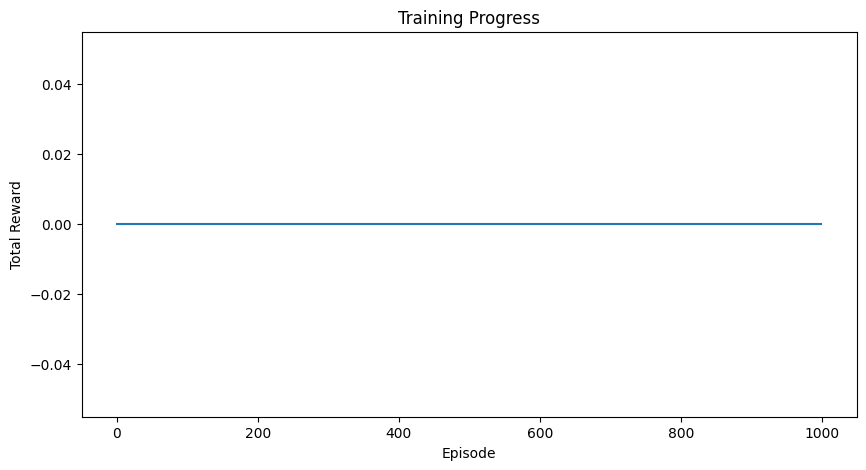

In [127]:
# from collections import deque
# import random
# from tqdm import tqdm

# # DQN Agent Implementation
# class DQNAgent:
#     def __init__(self, mdp, env):
#         self.mdp = mdp
#         self.env = env
        
#         # Get state size from featurized state
#         dummy_state = mdp.get_standard_start_state()
#         self.featurized_state_shape = env.featurize_state_mdp(dummy_state)[0].shape
#         self.state_size = np.prod(self.featurized_state_shape)
#         self.action_size = len(Action.ALL_ACTIONS)
        
#         # Hyperparameters
#         self.gamma = 0.95
#         self.epsilon = 1.0
#         self.epsilon_min = 0.01
#         self.epsilon_decay = 0.995
#         self.learning_rate = 0.001
#         self.batch_size = 32
#         self.memory = deque(maxlen=10000)
        
#         # Neural Network
#         self.device = torch.device("cuda" if torch.cuda.is_available() else "mps")
#         print("Device: ", self.device)
#         self.model = nn.Sequential(
#             nn.Linear(self.state_size, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, self.action_size)
#         ).to(self.device)
        
#         self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
    
#     def get_featurized_state(self, state):
#         """Convert state to feature vector"""
#         features = self.env.featurize_state_mdp(state)[0]
#         return features.flatten()
    
#     def remember(self, state, action, reward, next_state, done):
#         """Store experience in memory"""
#         state = self.get_featurized_state(state)
#         next_state = self.get_featurized_state(next_state)
#         self.memory.append((state, action, reward, next_state, done))
    
#     def act(self, state):
#         """Choose action using epsilon-greedy policy"""
#         if np.random.rand() <= self.epsilon:
#             return np.random.randint(self.action_size)
        
#         state = self.get_featurized_state(state)
#         state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
#         with torch.no_grad():
#             action_values = self.model(state)
#         return torch.argmax(action_values).item()
    
#     def replay(self):
#         """Train on batch of experiences"""
#         if len(self.memory) < self.batch_size:
#             return
        
#         # Sample random batch
#         minibatch = random.sample(self.memory, self.batch_size)
        
#         states = torch.FloatTensor(np.vstack([x[0] for x in minibatch])).to(self.device)
#         actions = torch.LongTensor([x[1] for x in minibatch]).to(self.device)
#         rewards = torch.FloatTensor([x[2] for x in minibatch]).to(self.device)
#         next_states = torch.FloatTensor(np.vstack([x[3] for x in minibatch])).to(self.device)
#         dones = torch.FloatTensor([x[4] for x in minibatch]).to(self.device)
        
#         # Current Q values
#         current_q = self.model(states).gather(1, actions.unsqueeze(1))
        
#         # Next Q values
#         with torch.no_grad():
#             next_q = self.model(next_states).max(1)[0]
#         target_q = rewards + (1 - dones) * self.gamma * next_q
        
#         # Compute loss and update
#         loss = F.mse_loss(current_q.squeeze(), target_q)
#         self.optimizer.zero_grad()
#         loss.backward()
#         self.optimizer.step()
        
#         # Decay epsilon
#         if self.epsilon > self.epsilon_min:
#             self.epsilon *= self.epsilon_decay

# def train_dqn(env, episodes=1000):
#     """Train DQN agent"""
#     # Create agents
#     agent0 = DQNAgent(env.mdp, env)
#     agent1 = RandomAgent() #GreedyHumanModel(mlam=MediumLevelActionManager(env.mdp, NO_COUNTERS_PARAMS))
    
#     # Training statistics
#     rewards_history = []
    
#     for episode in tqdm(range(episodes)):
#         env.reset()
#         total_reward = 0
#         done = False
        
#         while not done:
#             # Get current state
#             state = env.state
            
#             # Get actions
#             action0_idx = agent0.act(state)
#             action0 = Action.INDEX_TO_ACTION[action0_idx]
#             action1 = agent1.action(state)[0]  # RandomAgent returns (action, info)
            
#             # Take step in environment
#             next_state, reward, done, info = env.step((action0, action1))
            
#             # Store experience
#             agent0.remember(state, action0_idx, reward, next_state, done)
            
#             # Train agent
#             agent0.replay()
            
#             total_reward += reward
        
#         rewards_history.append(total_reward)
        
#         # Print progress
#         if episode % 100 == 0:
#             avg_reward = np.mean(rewards_history[-10:])
#             print(f"Episode: {episode}, Average Reward: {avg_reward:.2f}, Epsilon: {agent0.epsilon:.2f}")
    
#     return agent0, rewards_history

# # Create environment
# mdp = OvercookedGridworld.from_layout_name("cramped_room")
# env = OvercookedEnv.from_mdp(mdp, horizon=400)

# # Train agent
# print("Starting training...")
# trained_agent, rewards = train_dqn(env, episodes=1000)

# # Plot training progress
# plt.figure(figsize=(10, 5))
# plt.plot(rewards)
# plt.title('Training Progress')
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.show()

In [130]:
# Running a Single Episode - run_agents is called within get_rollouts to simulate individual episodes.

env.reset()
trajectory, time_taken, total_sparse_rews, total_shaped_reward = env.run_agents(agent_pair, display=False)
print("Trajectory: ", trajectory)
print("Time Taken: ", time_taken)
print("Total Sparse Rewards: ", total_sparse_rews)
print("Total Shaped Reward: ", total_shaped_reward)

Computing MotionPlanner
Trajectory:  [[<overcooked_ai_py.mdp.overcooked_mdp.OvercookedState object at 0x7fda850f4850>
  ((1, 0), (0, 1)) 0 False
  {'agent_infos': [{'action_probs': array([0., 0., 1., 0., 0., 0.])}, {'action_probs': array([0., 1., 0., 0., 0., 0.])}], 'sparse_r_by_agent': [0, 0], 'shaped_r_by_agent': [0, 0], 'phi_s': None, 'phi_s_prime': None}]
  ((1, 0), (1, 0)) 0 False
  {'agent_infos': [{'action_probs': array([0., 0., 1., 0., 0., 0.])}, {'action_probs': array([0., 0., 1., 0., 0., 0.])}], 'sparse_r_by_agent': [0, 0], 'shaped_r_by_agent': [0, 0], 'phi_s': None, 'phi_s_prime': None}]
  ((1, 0), 'interact') 0 False
  {'agent_infos': [{'action_probs': array([0., 0., 1., 0., 0., 0.])}, {'action_probs': array([0., 0., 0., 0., 0., 1.])}], 'sparse_r_by_agent': [0, 0], 'shaped_r_by_agent': [0, 0], 'phi_s': None, 'phi_s_prime': None}]
 ...
  ((1, 0), (0, 1)) 0 False
  {'agent_infos': [{'action_probs': array([0., 0., 1., 0., 0., 0.])}, {'action_probs': array([0., 1., 0., 0., 0., 